In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\USER\\Downloads'

In [3]:
df = pd.read_csv('Education+-+Post+12th+Standard.csv')

In [4]:
df.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [6]:
df.shape

(777, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [8]:
df.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [9]:
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

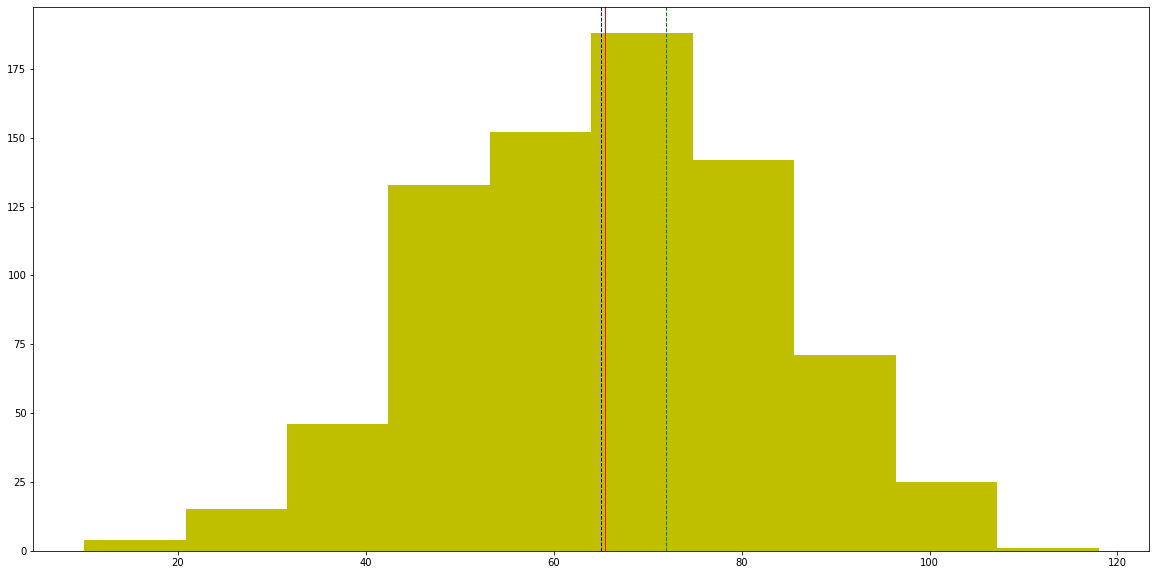

In [91]:
plt.figure(figsize=(20,10)) 
plt.hist(df['Grad.Rate'], color='y') 
plt.axvline(df['Grad.Rate'].mean(), color='r', linewidth=1)
plt.axvline(df['Grad.Rate'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['Grad.Rate'].mode()[0], color='g', linestyle='dashed', linewidth=1)

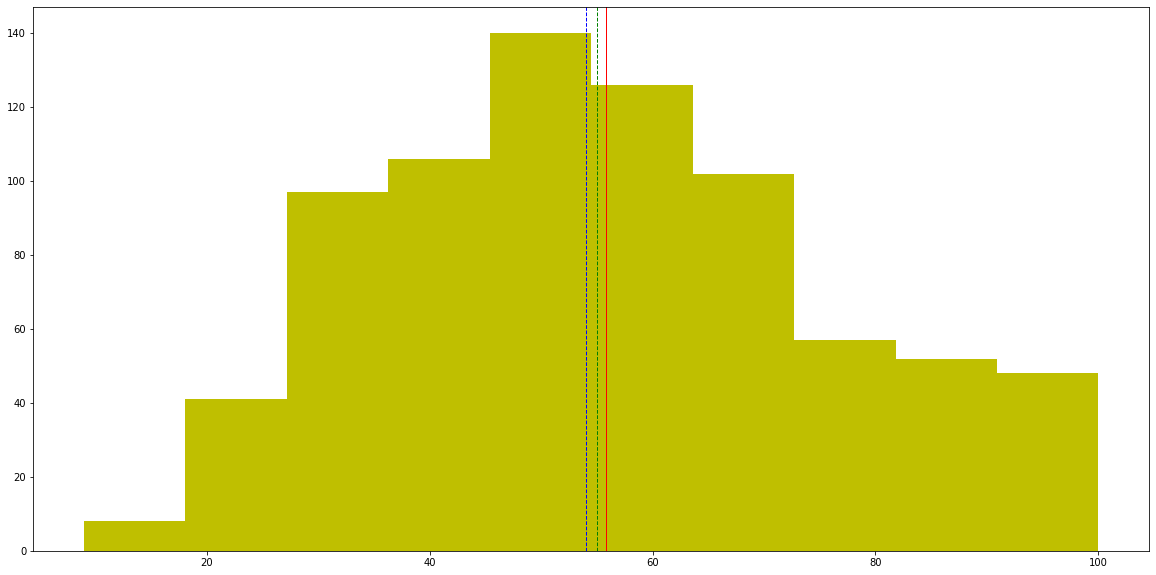

In [90]:
plt.figure(figsize=(20,10)) 
plt.hist(df['Top25perc'], color='y') 
plt.axvline(df['Top25perc'].mean(), color='r', linewidth=1)
plt.axvline(df['Top25perc'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['Top25perc'].mode()[0], color='g', linestyle='dashed', linewidth=1)

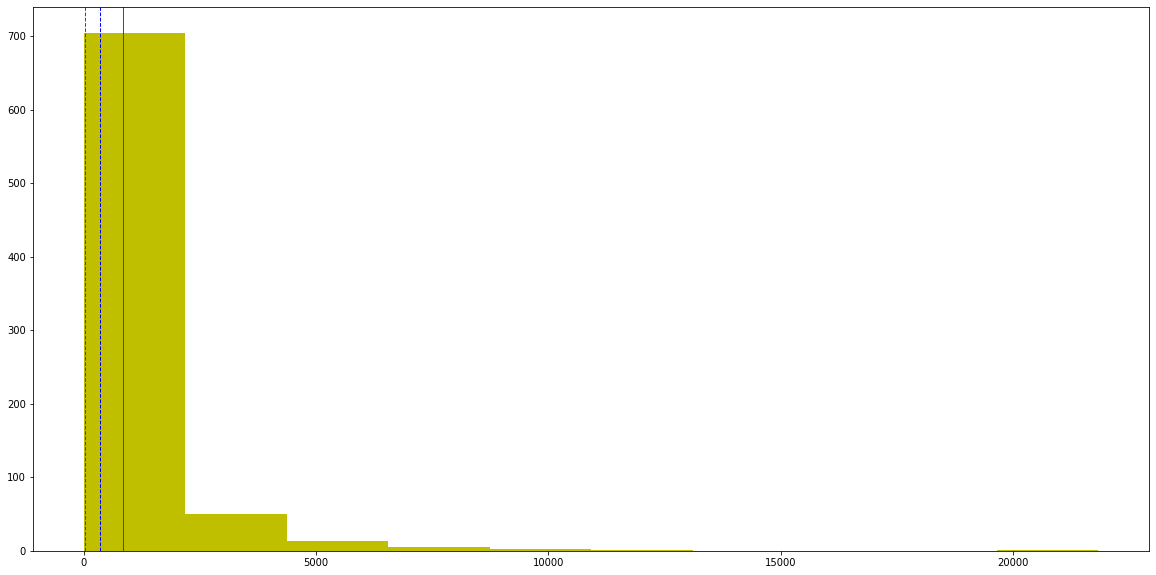

In [83]:
plt.figure(figsize=(20,10)) 
plt.hist(df['P.Undergrad'], color='y') 
plt.axvline(df['P.Undergrad'].mean(), color='r', linewidth=1)
plt.axvline(df['P.Undergrad'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['P.Undergrad'].mode()[0], color='g', linestyle='dashed', linewidth=1)

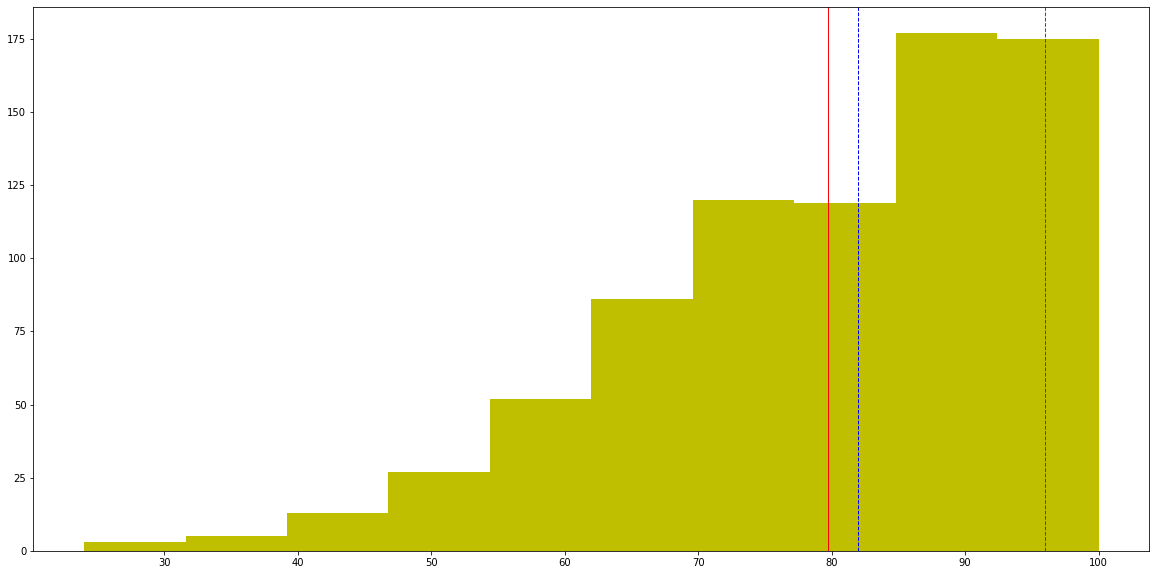

In [88]:
plt.figure(figsize=(20,10)) 
a = plt.hist(df['Terminal'], color='y') 
plt.axvline(df['Terminal'].mean(), color='r', linewidth=1)
plt.axvline(df['Terminal'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['Terminal'].mode()[0], color='g', linestyle='dashed', linewidth=1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BDED0C8>,
      dtype=object)

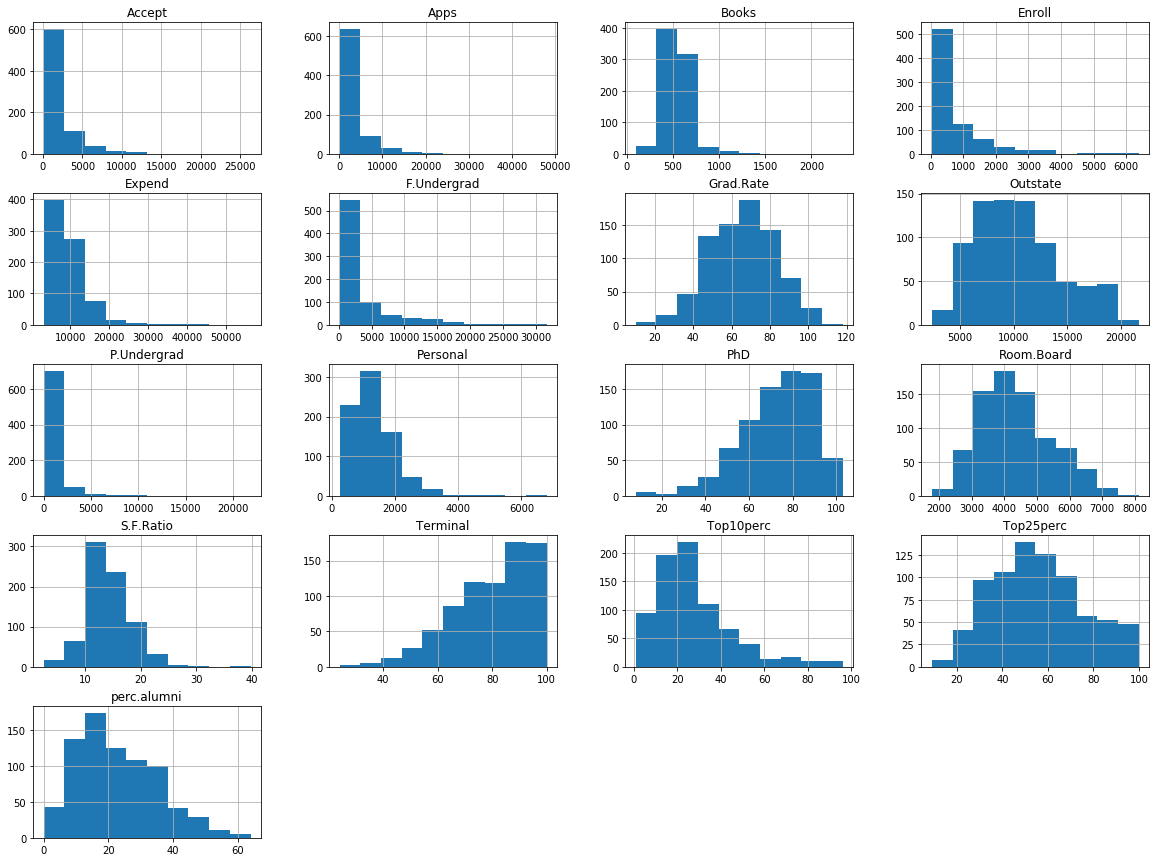

In [10]:
df.hist(figsize=(20,15))

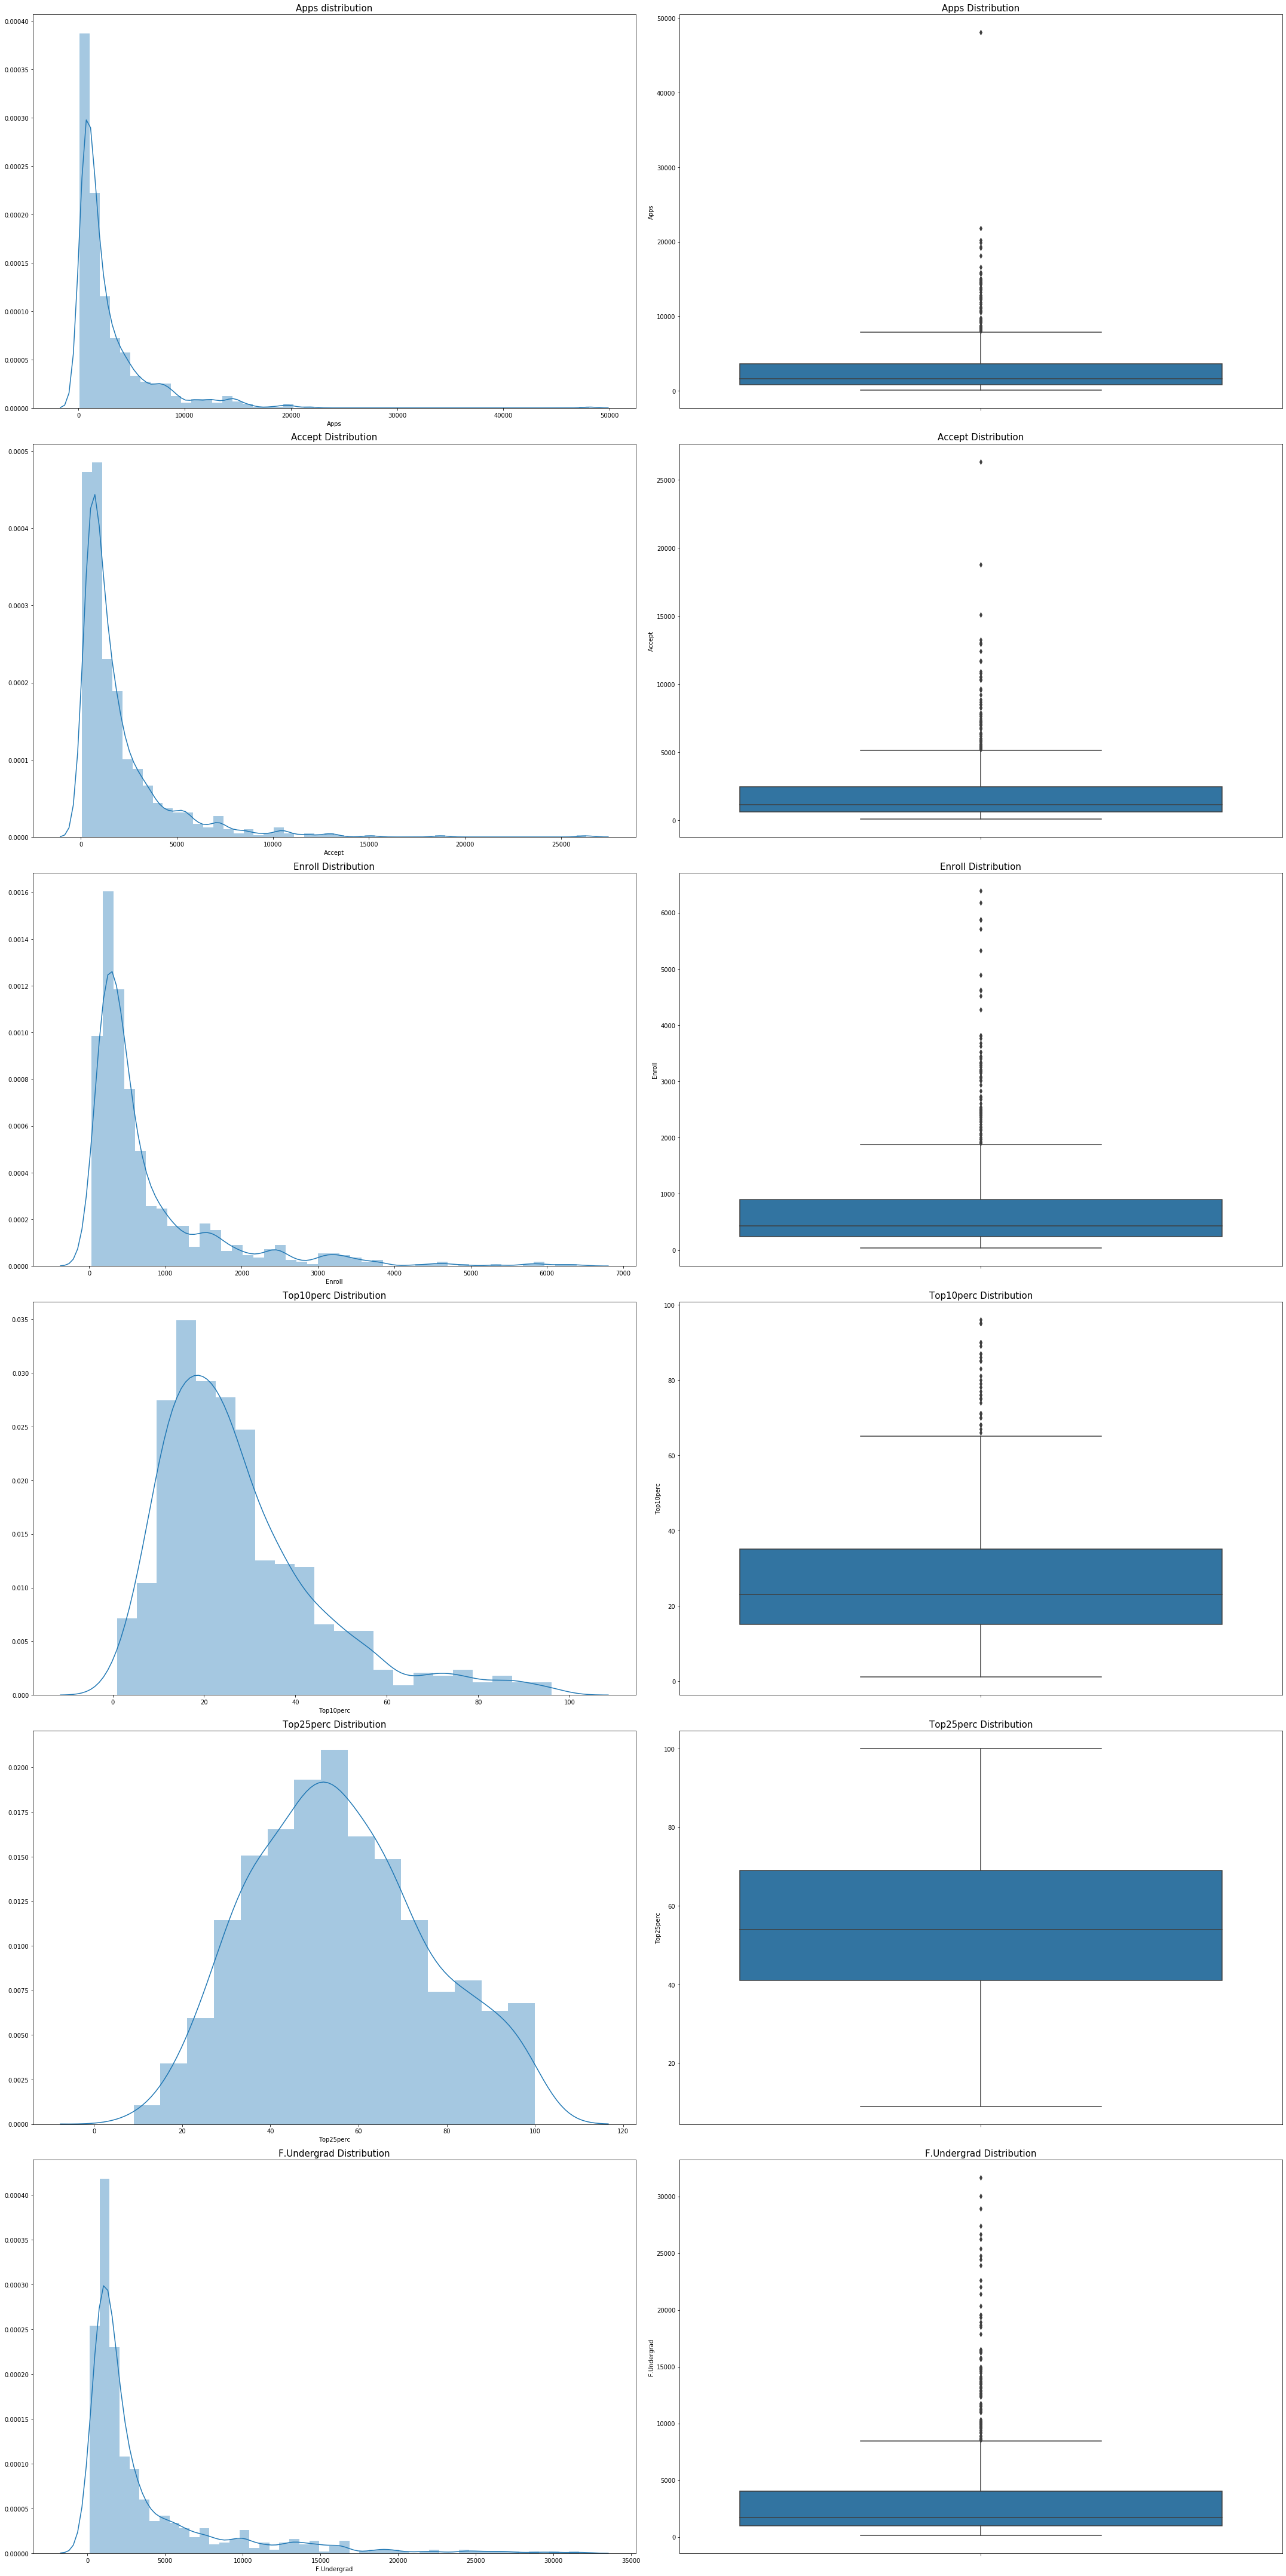

In [94]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(30, 60)

a = sns.distplot(df['Apps'] , ax=axes[0][0])
a.set_title("Apps distribution",fontsize=15)

a = sns.boxplot(df['Apps'] , orient = "v" , ax=axes[0][1])
a.set_title("Apps Distribution",fontsize=15)

a = sns.distplot(df['Accept'] , ax=axes[1][0])
a.set_title("Accept Distribution",fontsize=15)

a = sns.boxplot(df['Accept'] , orient = "v" , ax=axes[1][1])
a.set_title("Accept Distribution",fontsize=15)

a = sns.distplot(df['Enroll'] , ax=axes[2][0])
a.set_title("Enroll Distribution",fontsize=15)

a = sns.boxplot(df['Enroll'] , orient = "v" , ax=axes[2][1])
a.set_title("Enroll Distribution",fontsize=15)


a = sns.distplot(df['Top10perc'] , ax=axes[3][0])
a.set_title("Top10perc Distribution",fontsize=15)

a = sns.boxplot(df['Top10perc'] , orient = "v" , ax=axes[3][1])
a.set_title("Top10perc Distribution",fontsize=15)

a = sns.distplot(df['Top25perc'] , ax=axes[4][0])
a.set_title("Top25perc Distribution",fontsize=15)

a = sns.boxplot(df['Top25perc'] , orient = "v" , ax=axes[4][1])
a.set_title("Top25perc Distribution",fontsize=15)


a = sns.distplot(df['F.Undergrad'] , ax=axes[5][0])
a.set_title("F.Undergrad Distribution",fontsize=15)

a = sns.boxplot(df['F.Undergrad'] , orient = "v" , ax=axes[5][1])
a.set_title("F.Undergrad Distribution",fontsize=15)



plt.tight_layout()
plt.show()

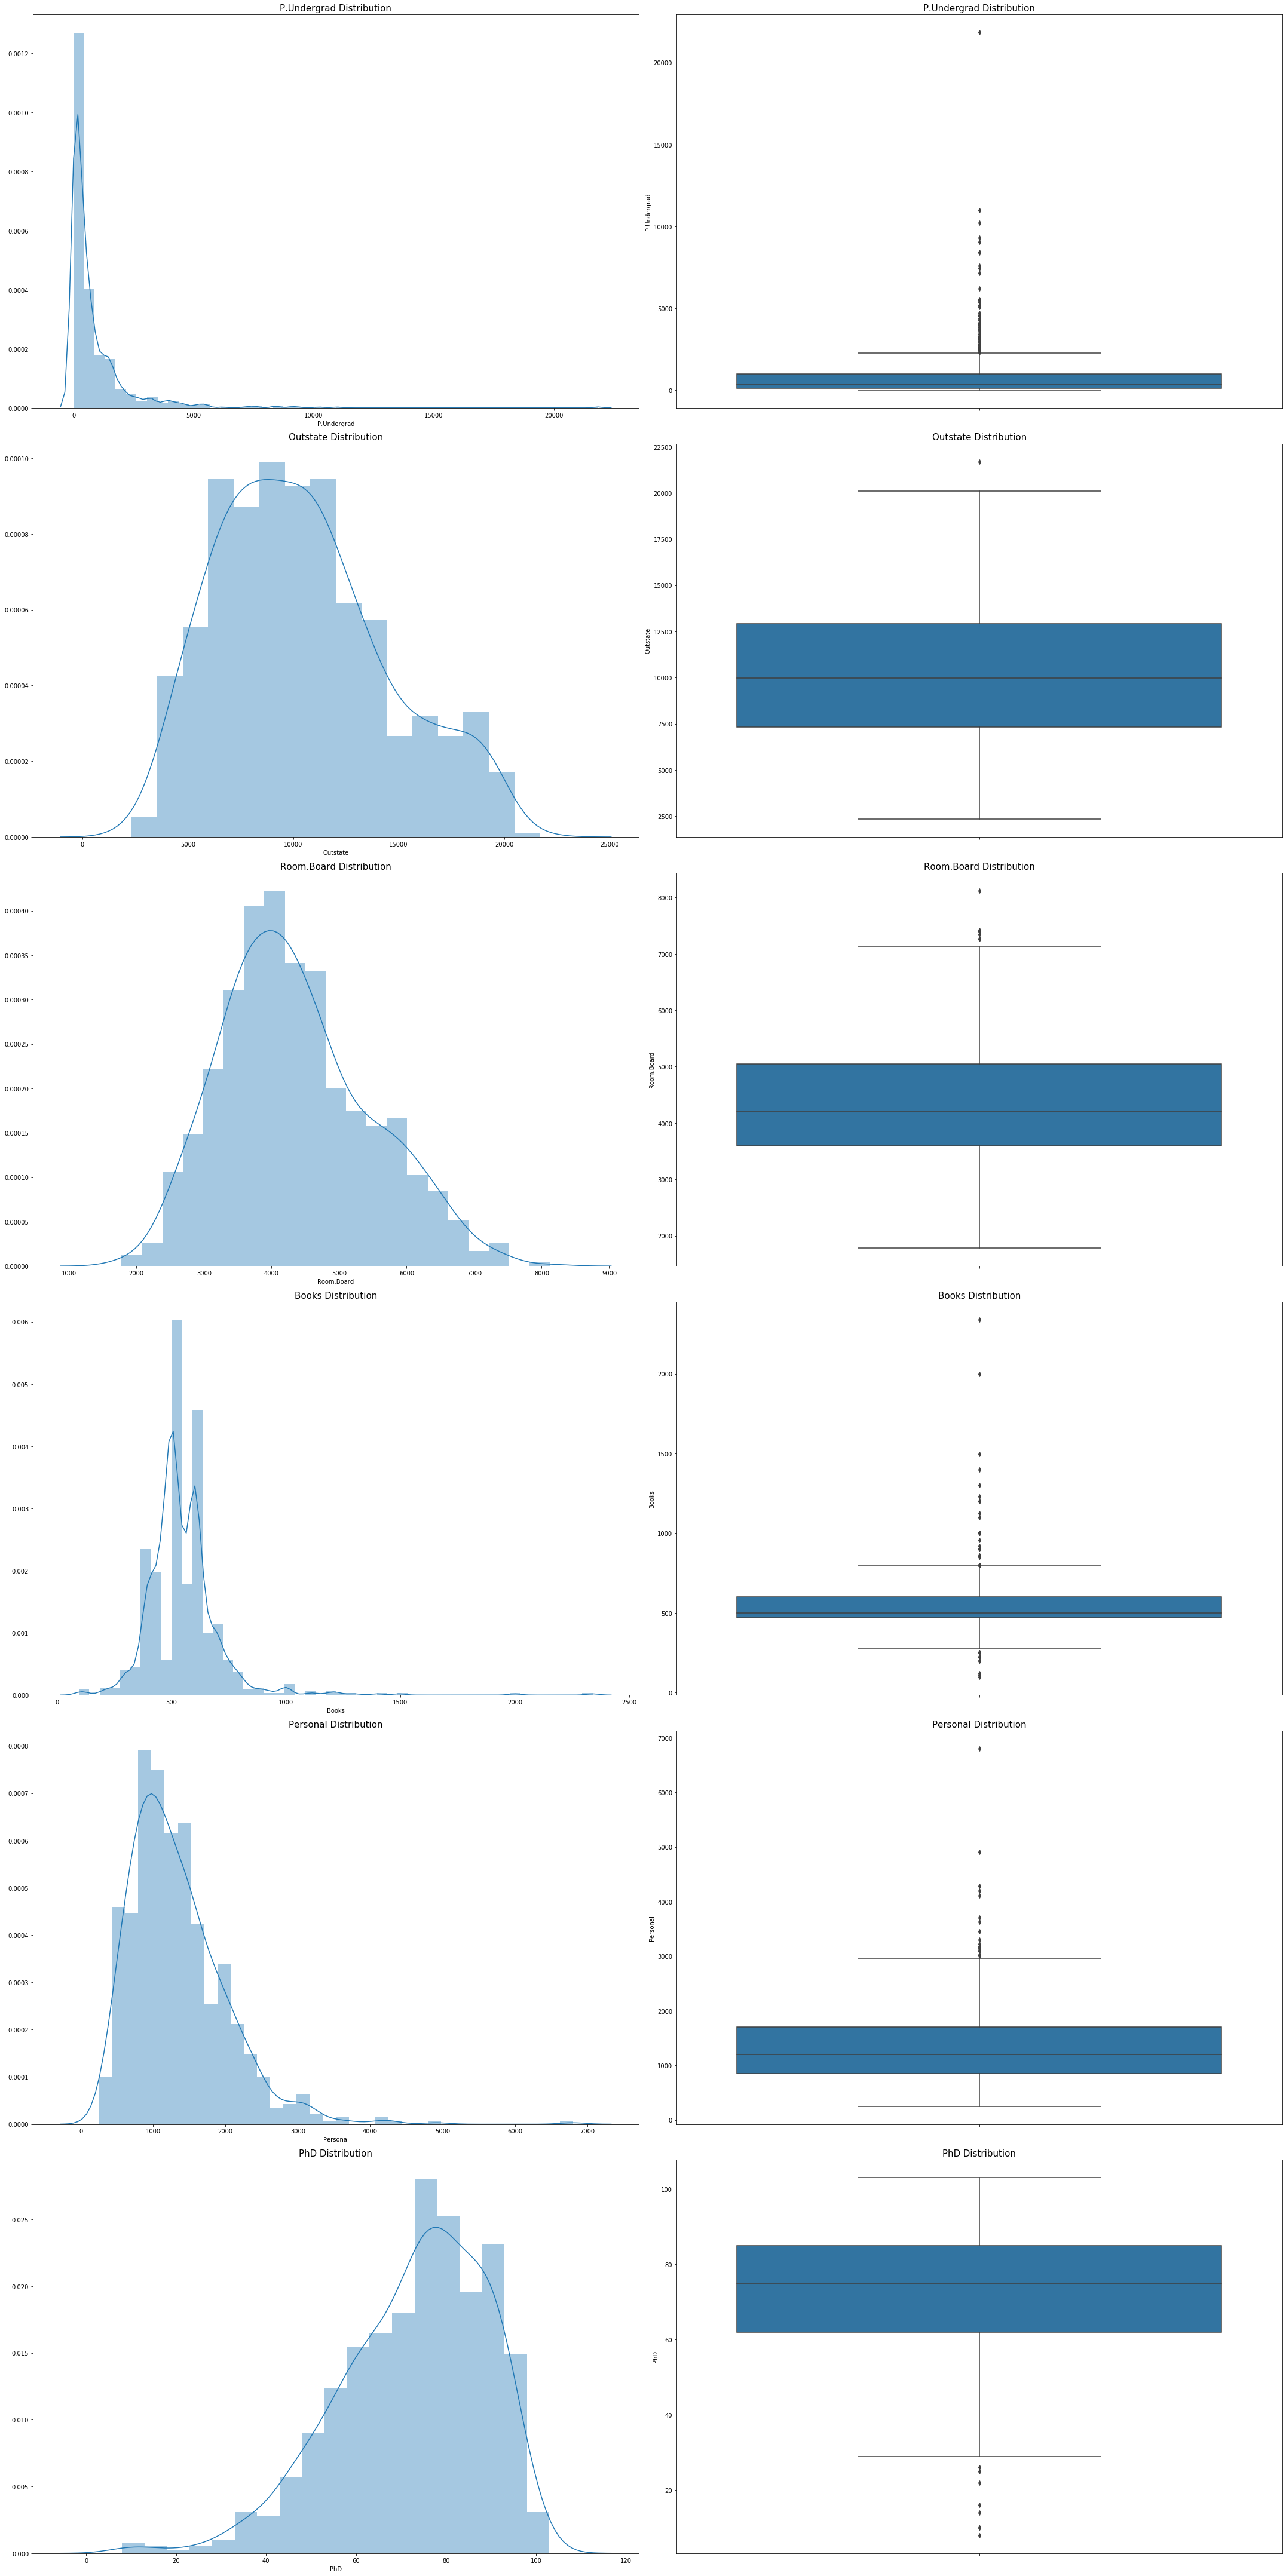

In [97]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(30, 60)

a = sns.distplot(df['P.Undergrad'] , ax=axes[0][0])
a.set_title("P.Undergrad Distribution",fontsize=15)

a = sns.boxplot(df['P.Undergrad'] , orient = "v" , ax=axes[0][1])
a.set_title("P.Undergrad Distribution",fontsize=15)


a = sns.distplot(df['Outstate'] , ax=axes[1][0])
a.set_title("Outstate Distribution",fontsize=15)

a = sns.boxplot(df['Outstate'] , orient = "v" , ax=axes[1][1])
a.set_title("Outstate Distribution",fontsize=15)


a = sns.distplot(df['Room.Board'] , ax=axes[2][0])
a.set_title("Room.Board Distribution",fontsize=15)

a = sns.boxplot(df['Room.Board'] , orient = "v" , ax=axes[2][1])
a.set_title("Room.Board Distribution",fontsize=15)


a = sns.distplot(df['Books'] , ax=axes[3][0])
a.set_title("Books Distribution",fontsize=15)

a = sns.boxplot(df['Books'] , orient = "v" , ax=axes[3][1])
a.set_title("Books Distribution",fontsize=15)


a = sns.distplot(df['Personal'] , ax=axes[4][0])
a.set_title("Personal Distribution",fontsize=15)

a = sns.boxplot(df['Personal'] , orient = "v" , ax=axes[4][1])
a.set_title("Personal Distribution",fontsize=15)


a = sns.distplot(df['PhD'] , ax=axes[5][0])
a.set_title("PhD Distribution",fontsize=15)

a = sns.boxplot(df['PhD'] , orient = "v" , ax=axes[5][1])
a.set_title("PhD Distribution",fontsize=15)


plt.tight_layout()
plt.show()

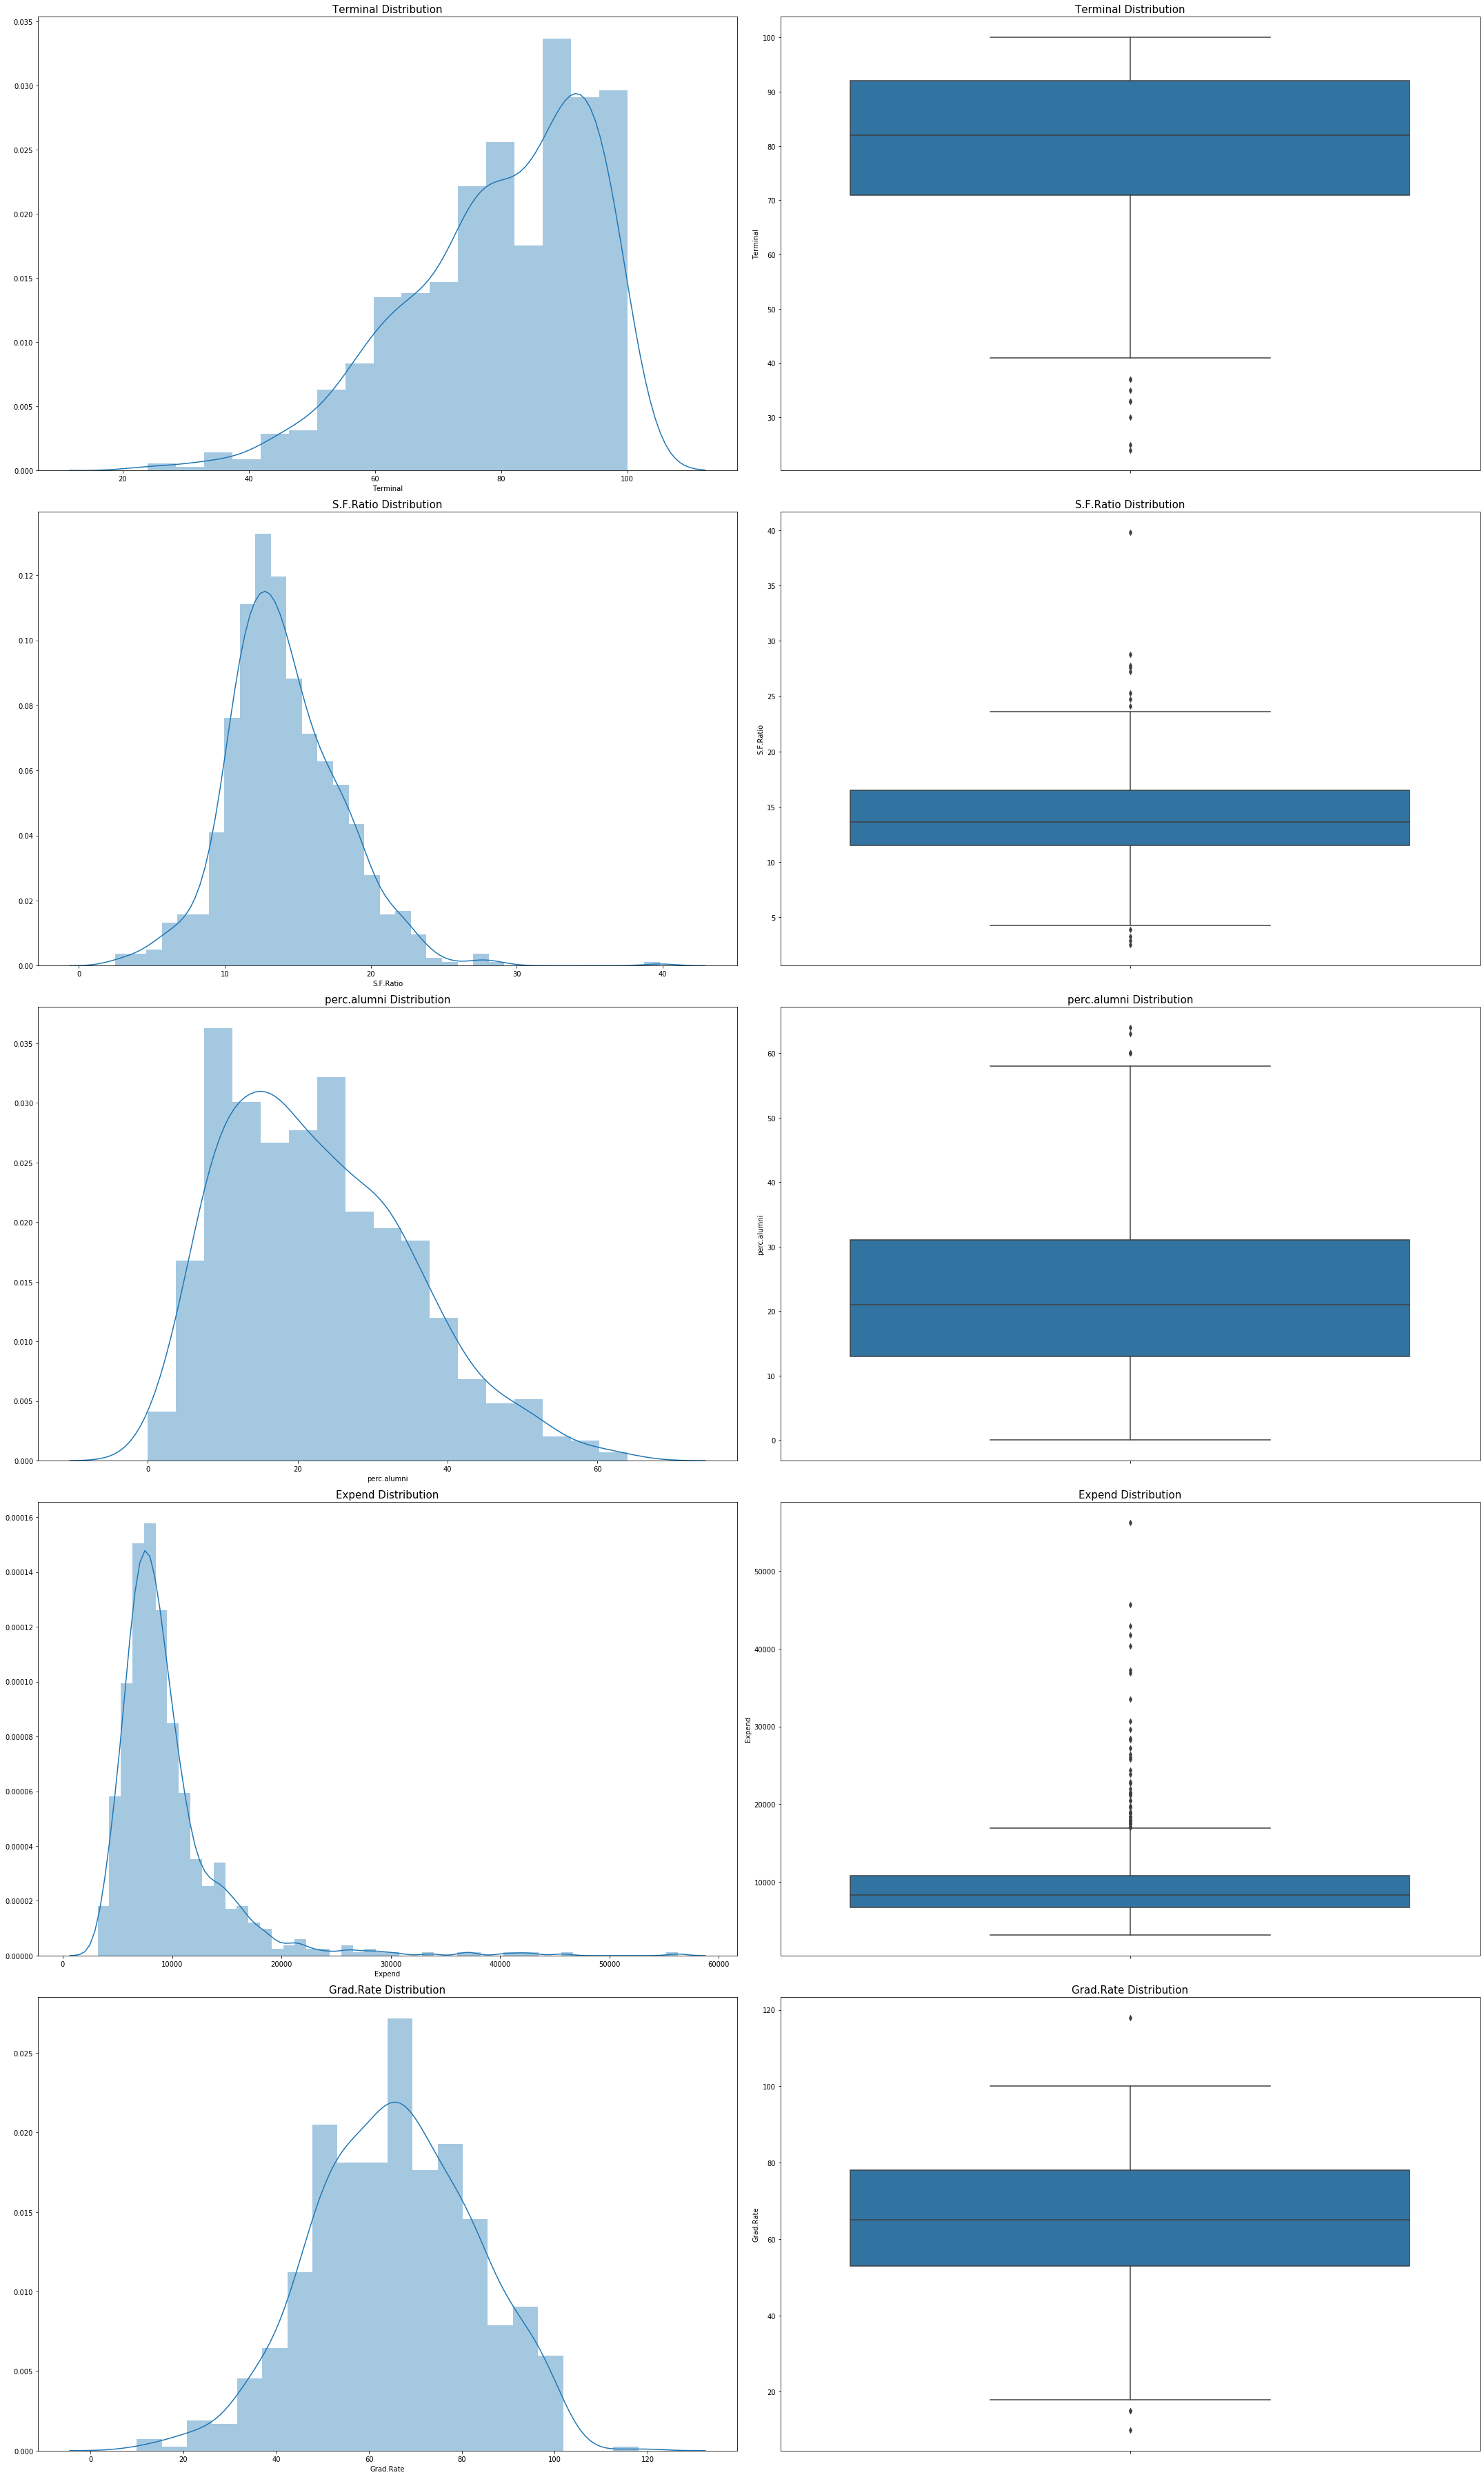

In [99]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(30, 50)

a = sns.distplot(df['Terminal'] , ax=axes[0][0])
a.set_title("Terminal Distribution",fontsize=15)

a = sns.boxplot(df['Terminal'] , orient = "v" , ax=axes[0][1])
a.set_title("Terminal Distribution",fontsize=15)

a = sns.distplot(df['S.F.Ratio'] , ax=axes[1][0])
a.set_title("S.F.Ratio Distribution",fontsize=15)

a = sns.boxplot(df['S.F.Ratio'] , orient = "v" , ax=axes[1][1])
a.set_title("S.F.Ratio Distribution",fontsize=15)

a = sns.distplot(df['perc.alumni'] , ax=axes[2][0])
a.set_title("perc.alumni Distribution",fontsize=15)

a = sns.boxplot(df['perc.alumni'] , orient = "v" , ax=axes[2][1])
a.set_title("perc.alumni Distribution",fontsize=15)

a = sns.distplot(df['Expend'] , ax=axes[3][0])
a.set_title("Expend Distribution",fontsize=15)

a = sns.boxplot(df['Expend'] , orient = "v" , ax=axes[3][1])
a.set_title("Expend Distribution",fontsize=15)

a = sns.distplot(df['Grad.Rate'] , ax=axes[4][0])
a.set_title("Grad.Rate Distribution",fontsize=15)

a = sns.boxplot(df['Grad.Rate'] , orient = "v" , ax=axes[4][1])
a.set_title("Grad.Rate Distribution",fontsize=15)


plt.tight_layout()
plt.show()

In [5]:
df.skew()

Apps           3.723750
Accept         3.417727
Enroll         2.690465
Top10perc      1.413217
Top25perc      0.259340
F.Undergrad    2.610458
P.Undergrad    5.692353
Outstate       0.509278
Room.Board     0.477356
Books          3.485025
Personal       1.742497
PhD           -0.768170
Terminal      -0.816542
S.F.Ratio      0.667435
perc.alumni    0.606891
Expend         3.459322
Grad.Rate     -0.113777
dtype: float64

In [12]:
df.duplicated().sum()

0

In [13]:
df.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

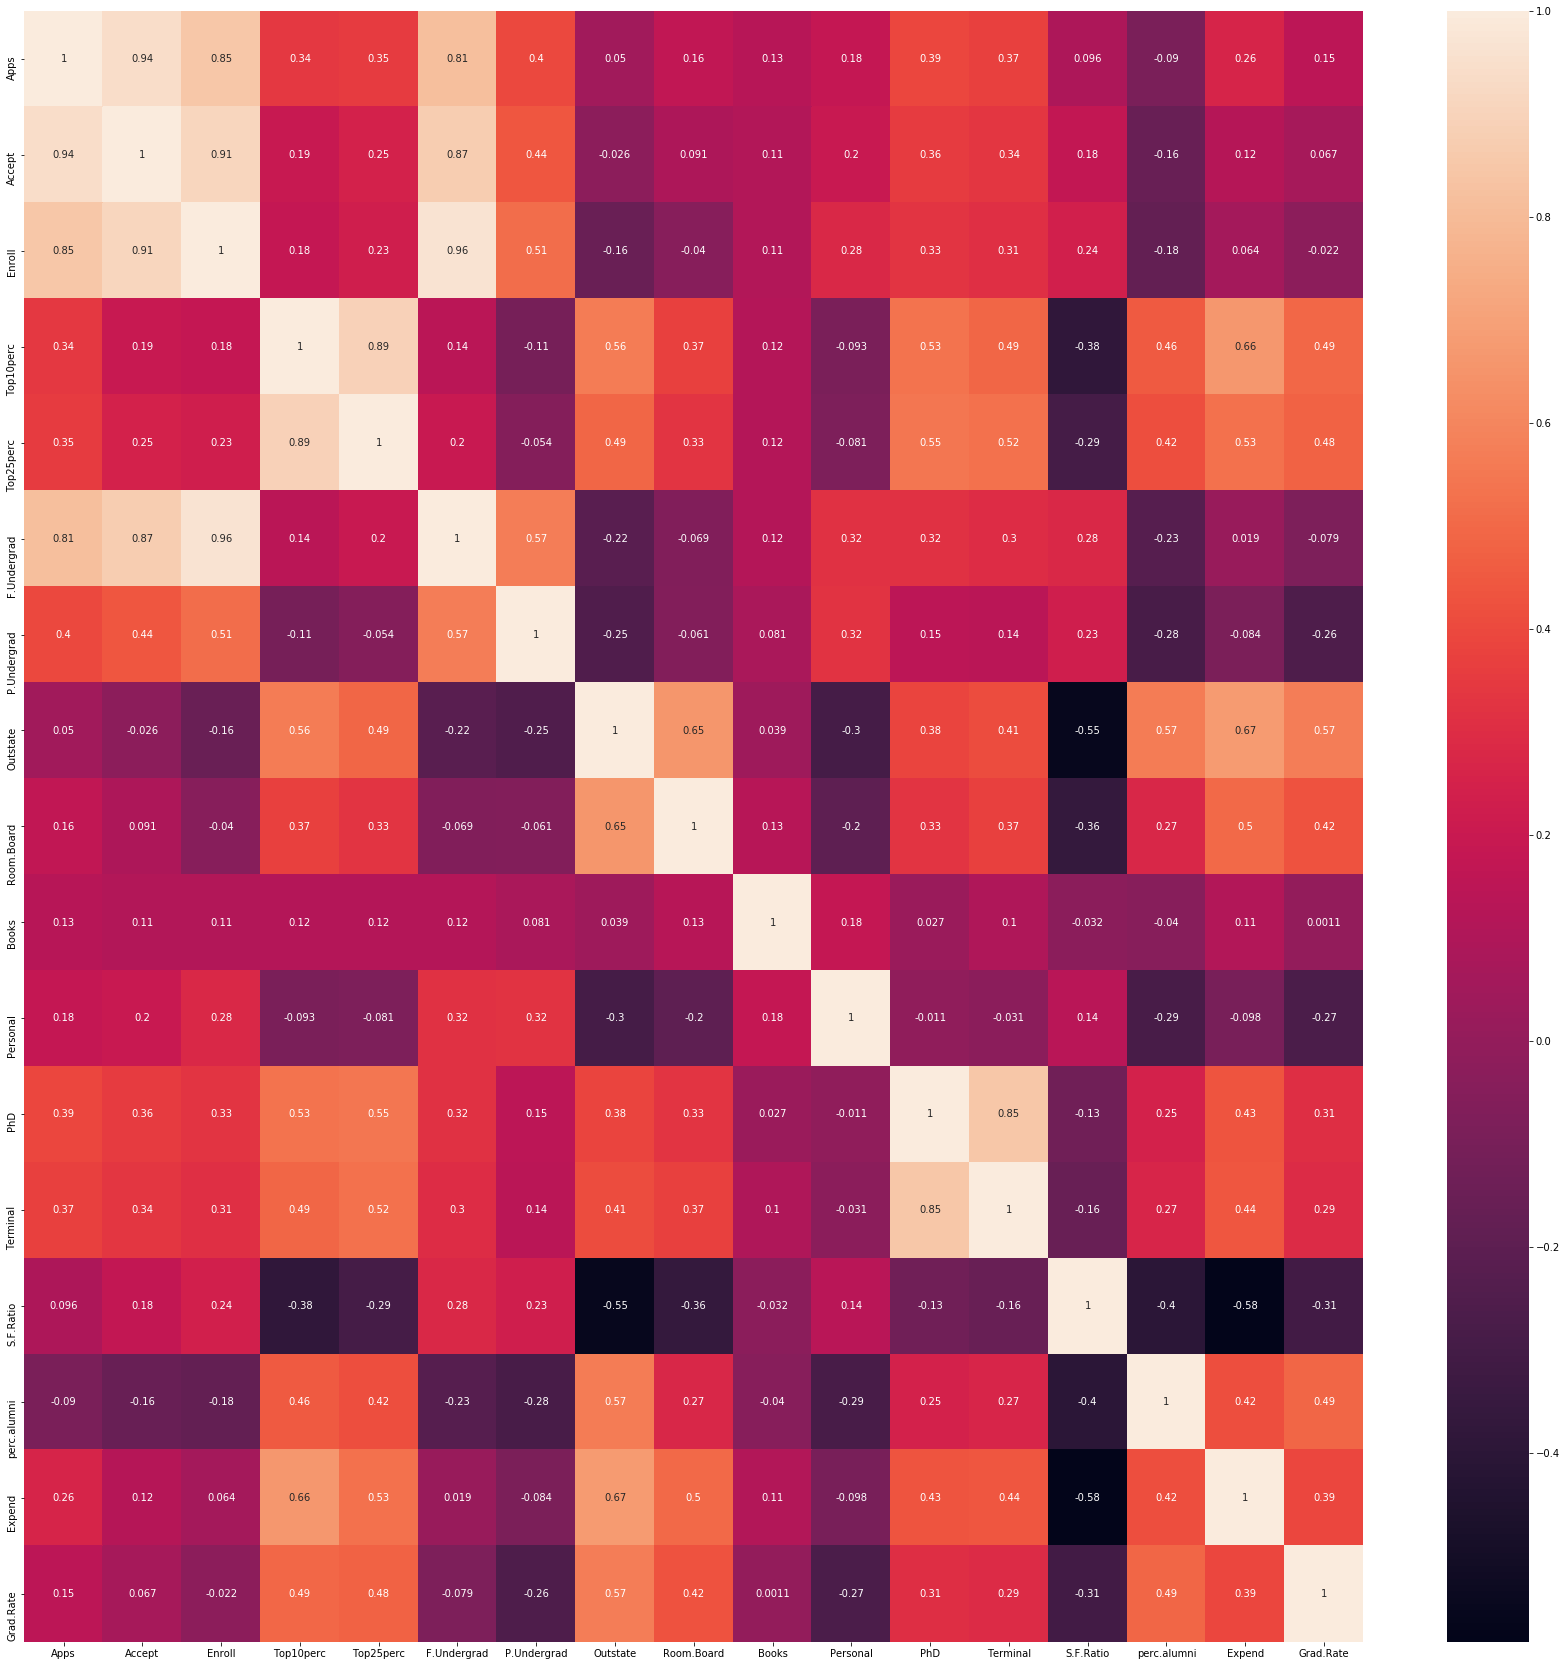

In [15]:
plt.subplots(figsize=(30,30))
sns.heatmap(df.corr() ,annot = True)

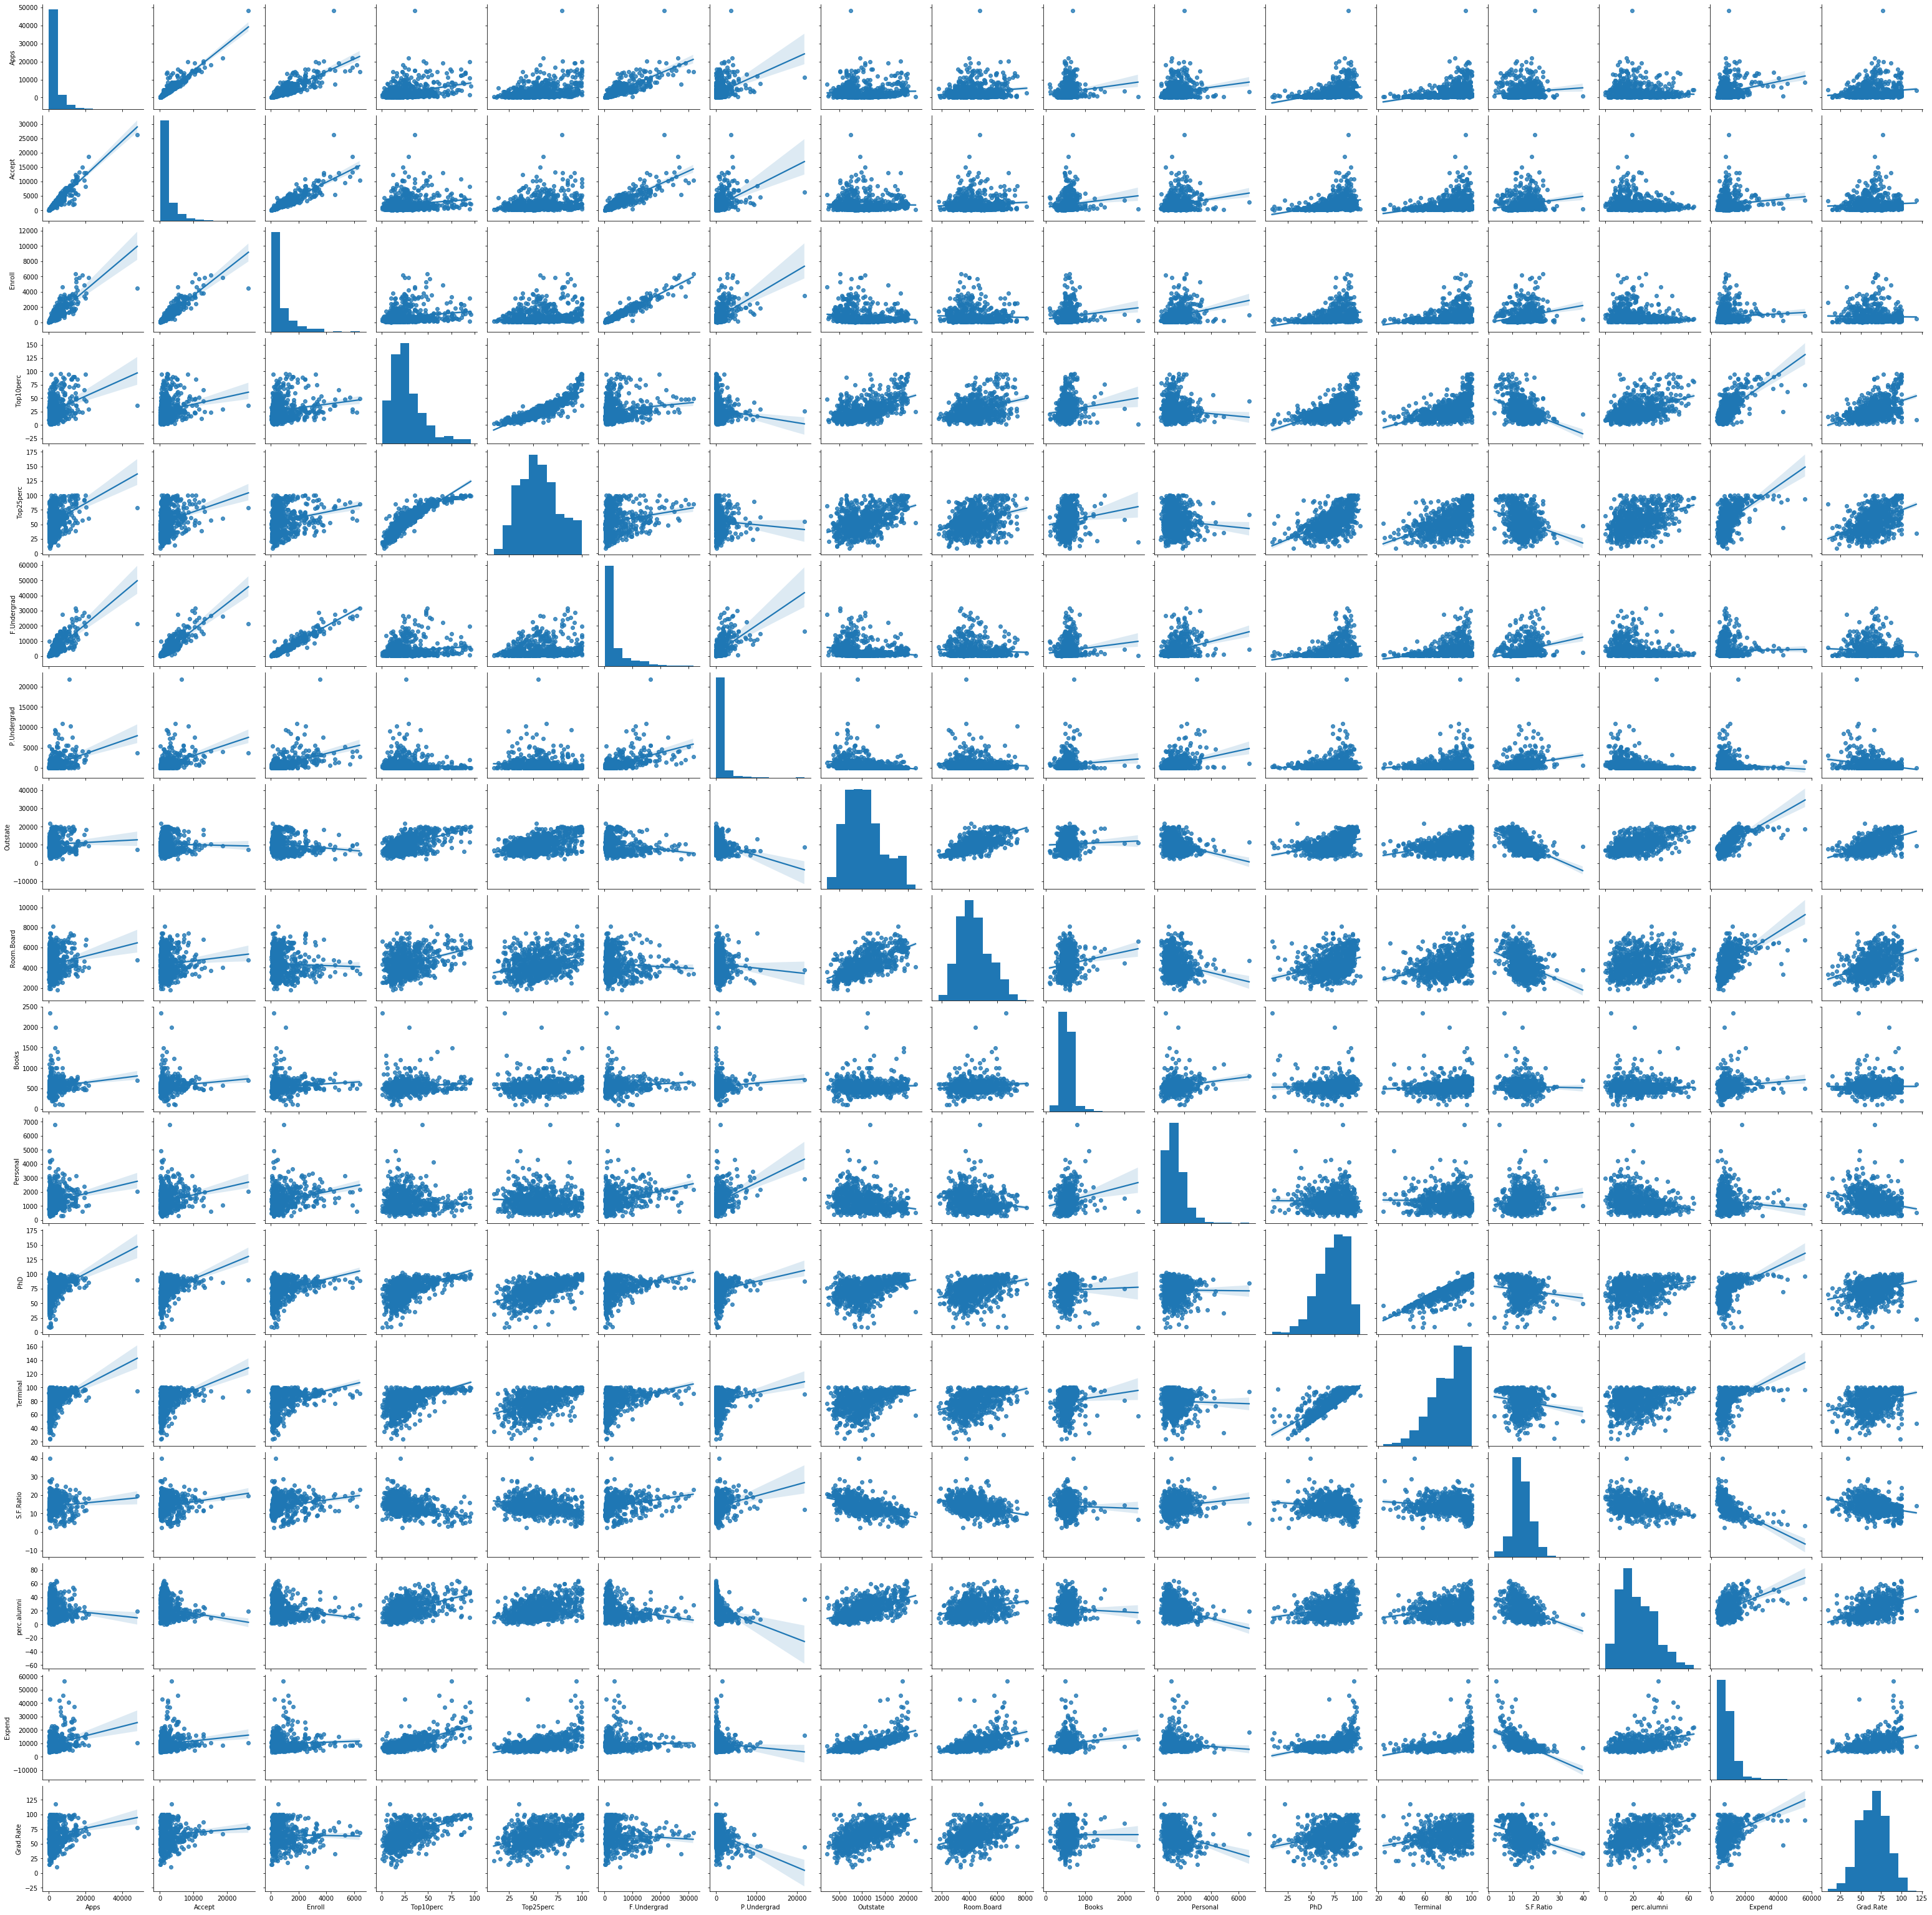

In [80]:
sns.pairplot(df, kind = "reg")

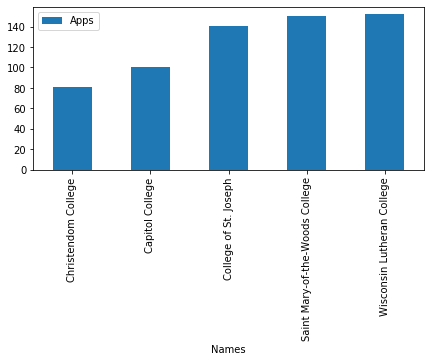

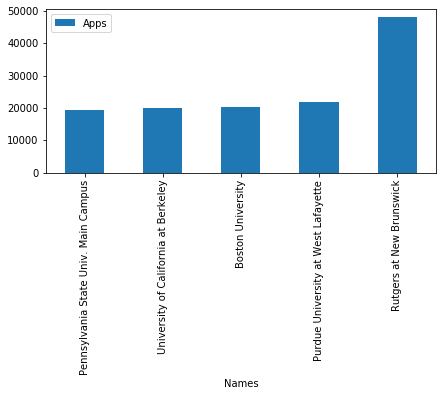

In [14]:
df.groupby(by=['Names'])['Apps'].sum().reset_index().sort_values(['Apps'],
                    ascending=True).head(5).plot(x='Names',y='Apps',kind='bar', figsize=(7,3))

df.groupby(by=['Names'])['Apps'].sum().reset_index().sort_values(['Apps']).tail(5).plot(x='Names',
                                                                                                           y='Apps',
                                                                                                           kind='bar',
                                                                                                           figsize=(7,3))


plt.show()

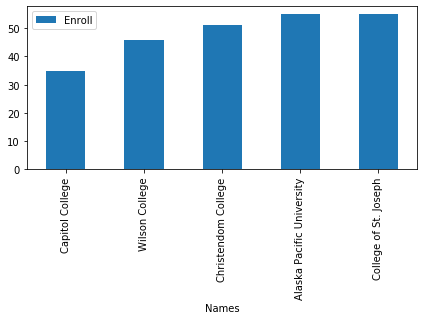

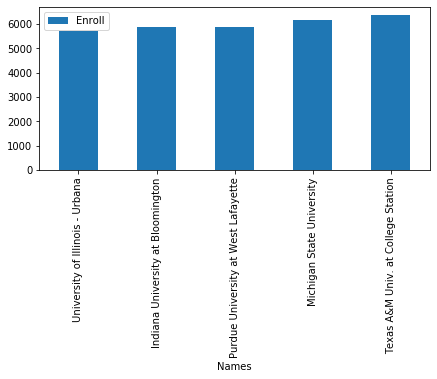

In [19]:
df.groupby(by=['Names'])['Enroll'].sum().reset_index().sort_values(['Enroll'],
                    ascending=True).head(5).plot(x='Names',y='Enroll',kind='bar', figsize=(7,3))

df.groupby(by=['Names'])['Enroll'].sum().reset_index().sort_values(['Enroll']).tail(5).plot(x='Names',
                                                                                                           y='Enroll',
                                                                                                           kind='bar',
                                                                                                           figsize=(7,3))


plt.show()

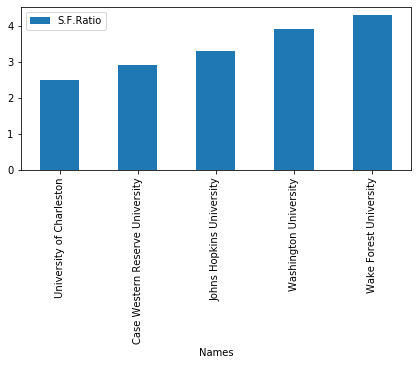

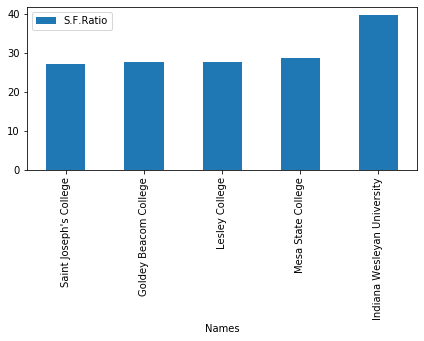

In [20]:
df.groupby(by=['Names'])['S.F.Ratio'].sum().reset_index().sort_values(['S.F.Ratio'],
                    ascending=True).head(5).plot(x='Names',y='S.F.Ratio',kind='bar', figsize=(7,3))

df.groupby(by=['Names'])['S.F.Ratio'].sum().reset_index().sort_values(['S.F.Ratio']).tail(5).plot(x='Names',
                                                                                                           y='S.F.Ratio',
                                                                                                           kind='bar',
                                                                                                           figsize=(7,3))


plt.show()

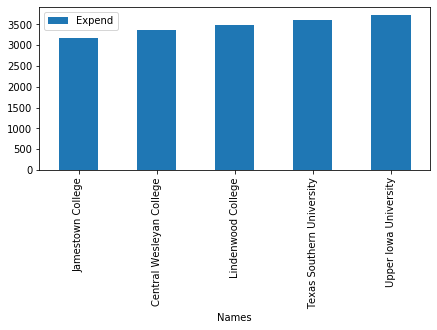

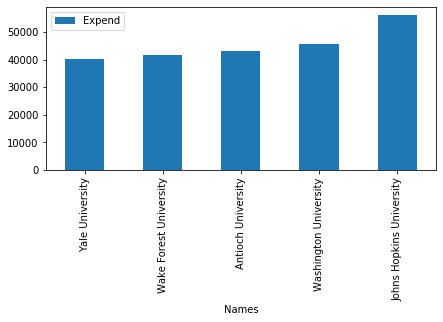

In [21]:
df.groupby(by=['Names'])['Expend'].sum().reset_index().sort_values(['Expend'],
                    ascending=True).head(5).plot(x='Names',y='Expend',kind='bar', figsize=(7,3))

df.groupby(by=['Names'])['Expend'].sum().reset_index().sort_values(['Expend']).tail(5).plot(x='Names',
                                                                                                           y='Expend',
                                                                                                           kind='bar',
                                                                                                           figsize=(7,3))


plt.show()

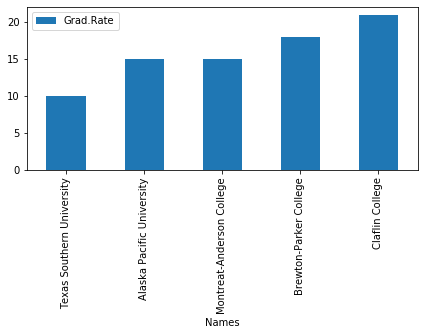

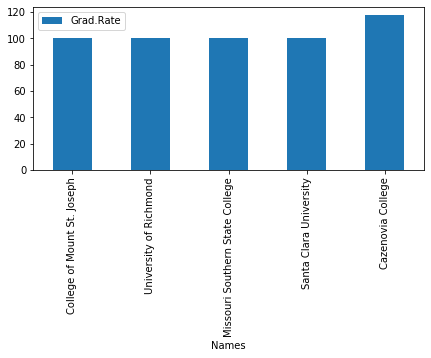

In [22]:
df.groupby(by=['Names'])['Grad.Rate'].sum().reset_index().sort_values(['Grad.Rate'],
                    ascending=True).head(5).plot(x='Names',y='Grad.Rate',kind='bar', figsize=(7,3))

df.groupby(by=['Names'])['Grad.Rate'].sum().reset_index().sort_values(['Grad.Rate']).tail(5).plot(x='Names',
                                                                                                           y='Grad.Rate',
                                                                                                           kind='bar',
                                                                                                           figsize=(7,3))


plt.show()

# Plotting Boxplot before outlier treatment

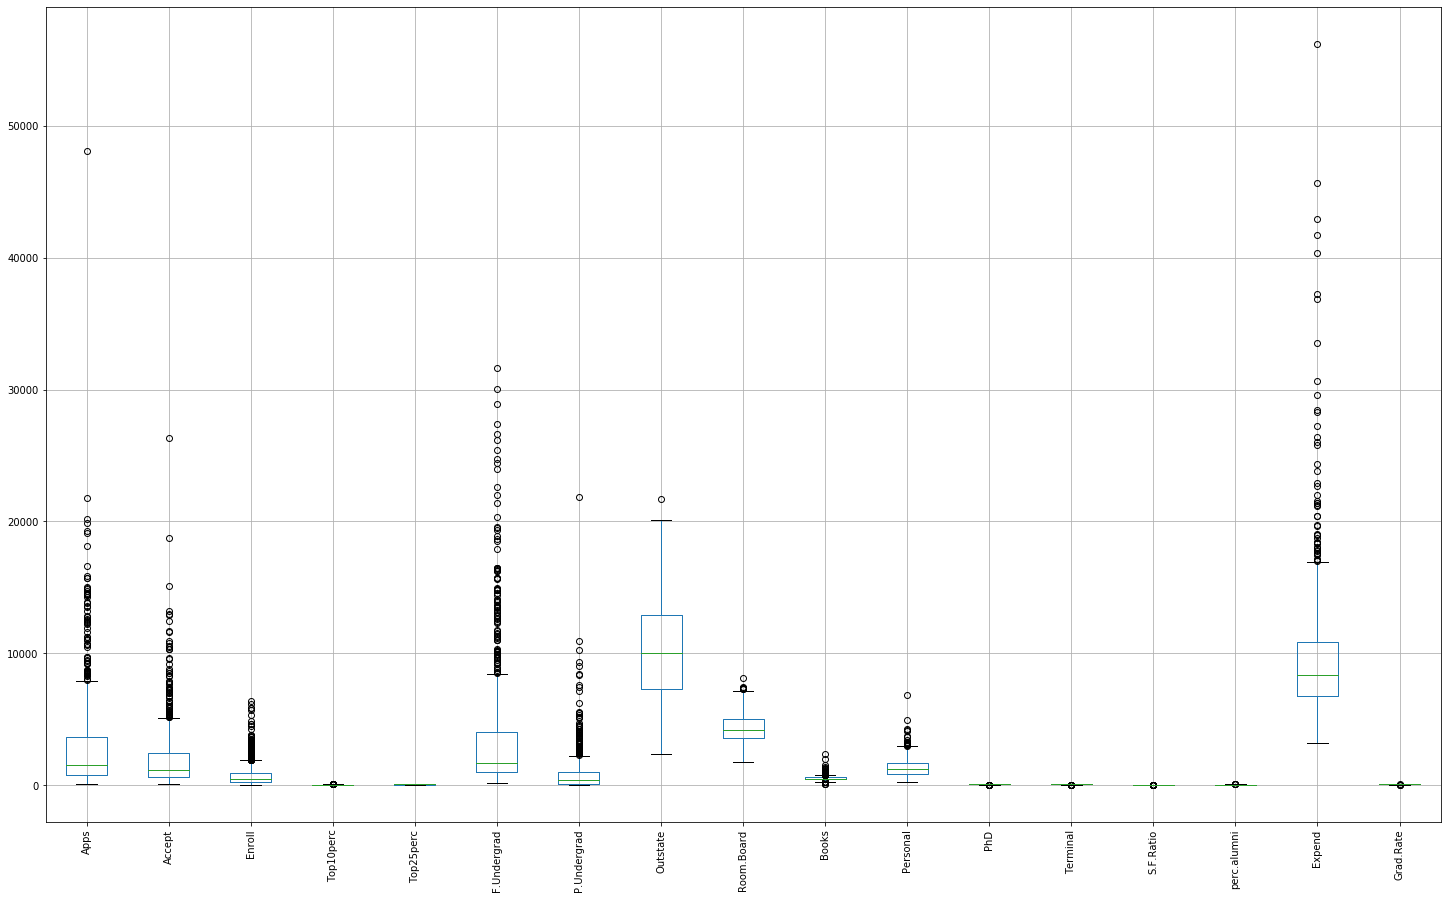

In [34]:
df.boxplot(figsize=(25,15))
plt.xticks(rotation=90)
plt.show()

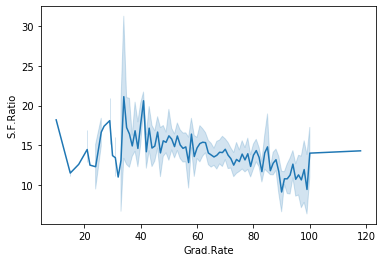

In [24]:
sns.lineplot(x='Grad.Rate',y='S.F.Ratio', data=df )

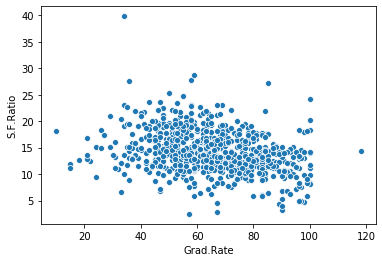

In [25]:
sns.scatterplot(x='Grad.Rate', y='S.F.Ratio', data=df) 
plt.show()

In [77]:
data_org = df.drop(['Names'], axis = 1)

# Scaling without treating outliers

In [78]:
from scipy.stats import zscore
data_sl=data_org.apply(zscore) # without treating outliers
data_sl.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

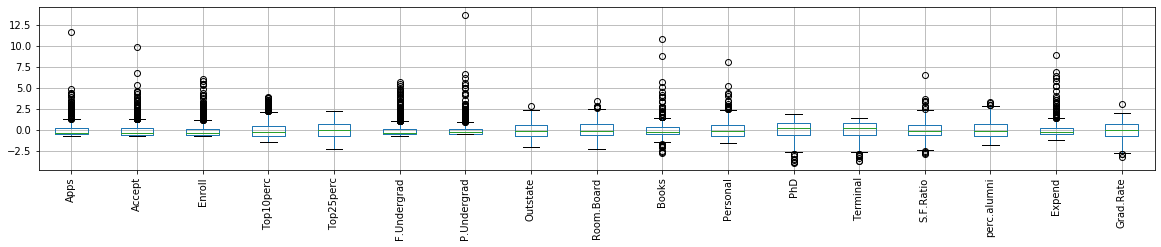

In [98]:
data_sl.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

In [85]:
data_df = df.drop(['Names'], axis = 1)

In [86]:
data_df

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0     1660    1232     721         23         52         2885          537   
1     2186    1924     512         16         29         2683         1227   
2     1428    1097     336         22         50         1036           99   
3      417     349     137         60         89          510           63   
4      193     146      55         16         44          249          869   
..     ...     ...     ...        ...        ...          ...          ...   
772   2197    1515     543          4         26         3089         2029   
773   1959    1805     695         24         47         2849         1107   
774   2097    1915     695         34         61         2793          166   
775  10705    2453    1317         95         99         5217           83   
776   2989    1855     691         28         63         2988         1726   

     Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0        7440        3300    450      2200   70        78       18.1   
1       12280        6450    750      1500   29        30       12.2   
2       11250        3750    400      1165   53        66       12.9   
3       12960        5450    450       875   92        97        7.7   
4        7560        4120    800      1500   76        72       11.9   
..        ...         ...    ...       ...  ...       ...        ...   
772      6797        3900    500      1200   60        60       21.0   
773     11520        4960    600      1250   73        75       13.3   
774      6900        4200    617       781   67        75       14.4   
775     19840        6510    630      2115   96        96        5.8   
776      4990        3560    500      1250   75        75       18.1   

     perc.alumni  Expend  Grad.Rate  
0             12    7041         60  
1             16   10527         56  
2             30    8735         54  
3             37   19016         59  
4              2   10922         15  
..           ...     ...        ...  
772           14    4469         40  
773           31    9189         83  
774           20    8323         49  
775           49   40386         99  
776           28    4509         99  

[777 rows x 17 columns]

In [87]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range =  Q3 + (1.5 * IQR)
    return lower_range, upper_range 

In [88]:
lApps,uApps=remove_outlier(data_df['Apps'])
data_df['Apps']=np.where(data_df['Apps']>uApps,uApps,data_df['Apps'])
data_df['Apps']=np.where(data_df['Apps']<lApps,lApps,data_df['Apps'])

lAccept,uAccept=remove_outlier(data_df['Accept'])
data_df['Accept']=np.where(data_df['Accept']>uAccept,uAccept,data_df['Accept'])
data_df['Accept']=np.where(data_df['Accept']<lAccept,lAccept,data_df['Accept'])

lE,uE=remove_outlier(data_df['Enroll'])
data_df['Enroll']=np.where(data_df['Enroll']>uE,uE,data_df['Enroll'])
data_df['Enroll']=np.where(data_df['Enroll']<lE,lE,data_df['Enroll'])

lT,uT=remove_outlier(data_df['Top10perc'])
data_df['Top10perc']=np.where(data_df['Top10perc']>uT,uT,data_df['Top10perc'])
data_df['Top10perc']=np.where(data_df['Top10perc']<lT,lT,data_df['Top10perc'])

lTo,uTo=remove_outlier(data_df['Top25perc'])
data_df['Top25perc']=np.where(data_df['Top25perc']>uTo,uTo,data_df['Top25perc'])
data_df['Top25perc']=np.where(data_df['Top25perc']<lTo,lTo,data_df['Top25perc'])

lfu,ufu=remove_outlier(data_df['F.Undergrad'])
data_df['F.Undergrad']=np.where(data_df['F.Undergrad']>ufu,ufu,data_df['F.Undergrad'])
data_df['F.Undergrad']=np.where(data_df['F.Undergrad']<lfu,lfu,data_df['F.Undergrad'])


lpu,upu=remove_outlier(data_df['P.Undergrad'])
data_df['P.Undergrad']=np.where(data_df['P.Undergrad']>upu,upu,data_df['P.Undergrad'])
data_df['P.Undergrad']=np.where(data_df['P.Undergrad']<lpu,lpu,data_df['P.Undergrad'])

lo,uo=remove_outlier(data_df['Outstate'])
data_df['Outstate']=np.where(data_df['Outstate']>uo,uo,data_df['Outstate'])
data_df['Outstate']=np.where(data_df['Outstate']<lo,lo,data_df['Outstate'])

lr,ur=remove_outlier(data_df['Room.Board'])
data_df['Room.Board']=np.where(data_df['Room.Board']>ur,ur,data_df['Room.Board'])
data_df['Room.Board']=np.where(data_df['Room.Board']<lr,lr,data_df['Room.Board'])

lb,ub=remove_outlier(data_df['Books'])
data_df['Books']=np.where(data_df['Books']>ub,ub,data_df['Books'])
data_df['Books']=np.where(data_df['Books']<lb,lb,data_df['Books'])

lp,up=remove_outlier(data_df['Personal'])
data_df['Personal']=np.where(data_df['Personal']>up,up,data_df['Personal'])
data_df['Personal']=np.where(data_df['Personal']<lp,lp,data_df['Personal'])

lph,uph=remove_outlier(data_df['PhD'])
data_df['PhD']=np.where(data_df['PhD']>uph,uph,data_df['PhD'])
data_df['PhD']=np.where(data_df['PhD']<lph,lph,data_df['PhD'])

lt,ut=remove_outlier(data_df['Terminal'])
data_df['Terminal']=np.where(data_df['Terminal']>ut,ut,data_df['Terminal'])
data_df['Terminal']=np.where(data_df['Terminal']<lt,lt,data_df['Terminal'])

ls,us=remove_outlier(data_df['S.F.Ratio'])
data_df['S.F.Ratio']=np.where(data_df['S.F.Ratio']>us,us,data_df['S.F.Ratio'])
data_df['S.F.Ratio']=np.where(data_df['S.F.Ratio']<ls,ls,data_df['S.F.Ratio'])

lpa,upa=remove_outlier(data_df['perc.alumni'])
data_df['perc.alumni']=np.where(data_df['perc.alumni']>upa,upa,data_df['perc.alumni'])
data_df['perc.alumni']=np.where(data_df['perc.alumni']<lpa,lpa,data_df['perc.alumni'])

lex,uex=remove_outlier(data_df['Expend'])
data_df['Expend']=np.where(data_df['Expend']>uex,uex,data_df['Expend'])
data_df['Expend']=np.where(data_df['Expend']<lex,lex,data_df['Expend'])

lg,ug=remove_outlier(data_df['Grad.Rate'])
data_df['Grad.Rate']=np.where(data_df['Grad.Rate']>ug,ug,data_df['Grad.Rate'])
data_df['Grad.Rate']=np.where(data_df['Grad.Rate']<lg,lg,data_df['Grad.Rate'])


In [82]:
data_df

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0     1660    1232     721         23         52         2885          537   
1     2186    1924     512         16         29         2683         1227   
2     1428    1097     336         22         50         1036           99   
3      417     349     137         60         89          510           63   
4      193     146      55         16         44          249          869   
..     ...     ...     ...        ...        ...          ...          ...   
772   2197    1515     543          4         26         3089         2029   
773   1959    1805     695         24         47         2849         1107   
774   2097    1915     695         34         61         2793          166   
775  10705    2453    1317         95         99         5217           83   
776   2989    1855     691         28         63         2988         1726   

     Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0        7440        3300    450      2200   70        78       18.1   
1       12280        6450    750      1500   29        30       12.2   
2       11250        3750    400      1165   53        66       12.9   
3       12960        5450    450       875   92        97        7.7   
4        7560        4120    800      1500   76        72       11.9   
..        ...         ...    ...       ...  ...       ...        ...   
772      6797        3900    500      1200   60        60       21.0   
773     11520        4960    600      1250   73        75       13.3   
774      6900        4200    617       781   67        75       14.4   
775     19840        6510    630      2115   96        96        5.8   
776      4990        3560    500      1250   75        75       18.1   

     perc.alumni  Expend  Grad.Rate  
0             12    7041         60  
1             16   10527         56  
2             30    8735         54  
3             37   19016         59  
4              2   10922         15  
..           ...     ...        ...  
772           14    4469         40  
773           31    9189         83  
774           20    8323         49  
775           49   40386         99  
776           28    4509         99  

[777 rows x 17 columns]

In [90]:
from scipy.stats import zscore
data_new=data_df.apply(zscore)
data_new.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.376493 -0.337830  0.106380  -0.246780  -0.191827    -0.018769   
1 -0.159195  0.116744 -0.260441  -0.696290  -1.353911    -0.093626   
2 -0.472336 -0.426511 -0.569343  -0.310996  -0.292878    -0.703966   
3 -0.889994 -0.917871 -0.918613   2.129202   1.677612    -0.898889   
4 -0.982532 -1.051221 -1.062533  -0.696290  -0.596031    -0.995610   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.166083 -0.746480   -0.968324 -0.776567  1.438500 -0.174045 -0.123239   
1     0.797856  0.457762    1.921680  1.828605  0.289289 -2.745731 -2.785068   
2    -0.777974  0.201488   -0.555466 -1.210762 -0.260691 -1.240354 -0.952900   
3    -0.828267  0.626954    1.004218 -0.776567 -0.736792  1.205884  1.190391   
4     0.297726 -0.716623   -0.216006  2.219381  0.289289  0.202299 -0.538069   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.070602    -0.870466 -0.630916  -0.319205  
1  -0.489511    -0.545726  0.396097  -0.552693  
2  -0.304413     0.590864 -0.131845  -0.669437  
3  -1.679429     1.159159  2.287940  -0.377577  
4  -0.568839    -1.682316  0.512468  -2.916759

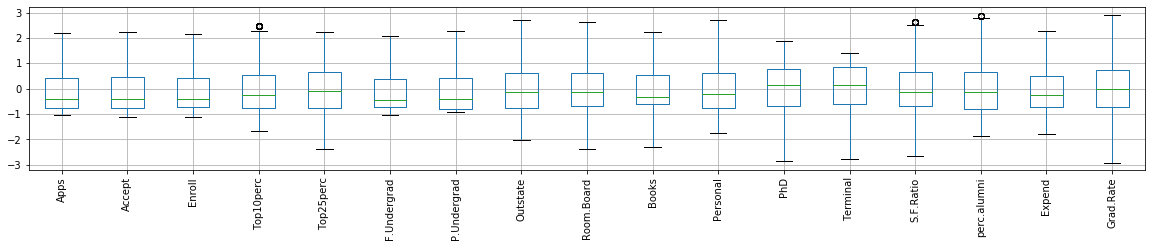

In [91]:
data_new.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

In [92]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range =  Q3 + (1.5 * IQR)
    return lower_range, upper_range 

In [93]:
lT,uT=remove_outlier(data_new['Top10perc'])
data_new['Top10perc']=np.where(data_new['Top10perc']>uT,uT,data_new['Top10perc'])
data_new['Top10perc']=np.where(data_new['Top10perc']<lT,lT,data_new['Top10perc'])

ls,us=remove_outlier(data_new['S.F.Ratio'])
data_new['S.F.Ratio']=np.where(data_new['S.F.Ratio']>us,us,data_new['S.F.Ratio'])
data_new['S.F.Ratio']=np.where(data_new['S.F.Ratio']<ls,ls,data_new['S.F.Ratio'])

lpa,upa=remove_outlier(data_new['perc.alumni'])
data_new['perc.alumni']=np.where(data_new['perc.alumni']>upa,upa,data_new['perc.alumni'])
data_new['perc.alumni']=np.where(data_new['perc.alumni']<lpa,lpa,data_new['perc.alumni'])

# scaling after treating outliers

In [95]:
data_new.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.376493 -0.337830  0.106380  -0.246780  -0.191827    -0.018769   
1 -0.159195  0.116744 -0.260441  -0.696290  -1.353911    -0.093626   
2 -0.472336 -0.426511 -0.569343  -0.310996  -0.292878    -0.703966   
3 -0.889994 -0.917871 -0.918613   2.129202   1.677612    -0.898889   
4 -0.982532 -1.051221 -1.062533  -0.696290  -0.596031    -0.995610   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.166083 -0.746480   -0.968324 -0.776567  1.438500 -0.174045 -0.123239   
1     0.797856  0.457762    1.921680  1.828605  0.289289 -2.745731 -2.785068   
2    -0.777974  0.201488   -0.555466 -1.210762 -0.260691 -1.240354 -0.952900   
3    -0.828267  0.626954    1.004218 -0.776567 -0.736792  1.205884  1.190391   
4     0.297726 -0.716623   -0.216006  2.219381  0.289289  0.202299 -0.538069   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.070602    -0.870466 -0.630916  -0.319205  
1  -0.489511    -0.545726  0.396097  -0.552693  
2  -0.304413     0.590864 -0.131845  -0.669437  
3  -1.679429     1.159159  2.287940  -0.377577  
4  -0.568839    -1.682316  0.512468  -2.916759

# Box plot after treating outliers

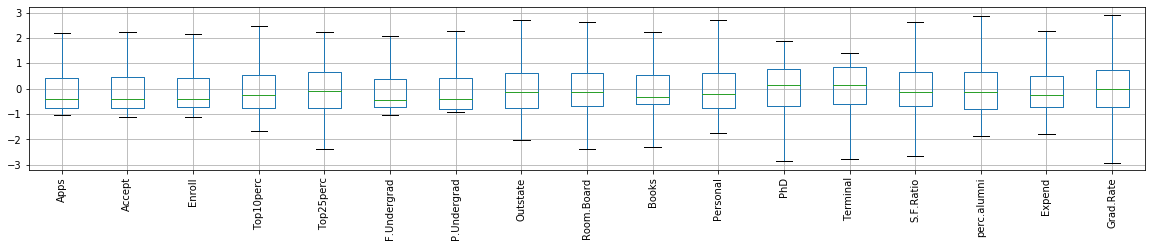

In [96]:
data_new.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

In [97]:
cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-

In [55]:
df_corr = data_df.copy()
df_corr.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.955307  0.896883   0.321342   0.364491     0.861002   
Accept       0.955307  1.000000  0.935277   0.223298   0.273681     0.897034   
Enroll       0.896883  0.935277  1.000000   0.171756   0.230434     0.967302   
Top10perc    0.321342  0.223298  0.171756   1.000000   0.913875     0.111215   
Top25perc    0.364491  0.273681  0.230434   0.913875   1.000000     0.181196   
F.Undergrad  0.861002  0.897034  0.967302   0.111215   0.181196     1.000000   
P.Undergrad  0.519823  0.572691  0.641595  -0.180009  -0.099295     0.696130   
Outstate     0.065337 -0.005002 -0.155655   0.562160   0.489569    -0.226166   
Room.Board   0.187475  0.119586 -0.023846   0.357366   0.330987    -0.054476   
Books        0.236138  0.208705  0.202057   0.153452   0.169761     0.207879   
Personal     0.229948  0.256346  0.339348  -0.116730  -0.086810     0.359783   
PhD          0.463924  0.427341  0.381540   0.544048   0.551461     0.361564   
Terminal     0.434478  0.403409  0.354379   0.506748   0.527654     0.335054   
S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233     0.324504   
perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832    -0.285457   
Expend       0.242935  0.161808  0.054221   0.657039   0.572905     0.000371   
Grad.Rate    0.150803  0.078982 -0.023251   0.493670   0.478985    -0.082239   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.519823  0.065337    0.187475  0.236138  0.229948  0.463924   
Accept          0.572691 -0.005002    0.119586  0.208705  0.256346  0.427341   
Enroll          0.641595 -0.155655   -0.023846  0.202057  0.339348  0.381540   
Top10perc      -0.180009  0.562160    0.357366  0.153452 -0.116730  0.544048   
Top25perc      -0.099295  0.489569    0.330987  0.169761 -0.086810  0.551461   
F.Undergrad     0.696130 -0.226166   -0.054476  0.207879  0.359783  0.361564   
P.Undergrad     1.000000 -0.354216   -0.067638  0.122529  0.344053  0.127663   
Outstate       -0.354216  1.000000    0.655489  0.005110 -0.325609  0.391321   
Room.Board     -0.067638  0.655489    1.000000  0.108924 -0.219554  0.341469   
Books           0.122529  0.005110    0.108924  1.000000  0.239863  0.136390   
Personal        0.344053 -0.325609   -0.219554  0.239863  1.000000 -0.011684   
PhD             0.127663  0.391321    0.341469  0.136390 -0.011684  1.000000   
Terminal        0.122152  0.412579    0.379270  0.159318 -0.031971  0.862928   
S.F.Ratio       0.370607 -0.573683   -0.376430 -0.008536  0.173913 -0.129390   
perc.alumni    -0.419334  0.565736    0.272393 -0.042832 -0.305753  0.248877   
Expend         -0.201929  0.775328    0.580622  0.149983 -0.163271  0.510529   
Grad.Rate      -0.265158  0.572458    0.425790 -0.008051 -0.290894  0.310019   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.434478   0.126411    -0.101158  0.242935   0.150803  
Accept       0.403409   0.188506    -0.165516  0.161808   0.078982  
Enroll       0.354379   0.274269    -0.222723  0.054221  -0.023251  
Top10perc    0.506748  -0.387926     0.455797  0.657039   0.493670  
Top25perc    0.527654  -0.297233     0.416832  0.572905   0.478985  
F.Undergrad  0.335054   0.324504    -0.285457  0.000371  -0.082239  
P.Undergrad  0.122152   0.370607    -0.419334 -0.201929  -0.265158  
Outstate     0.412579  -0.573683     0.565736  0.775328   0.572458  
Room.Board   0.379270  -0.376430     0.272393  0.580622   0.425790  
Books        0.159318  -0.008536    -0.042832  0.149983  -0.008051  
Personal    -0.031971   0.173913    -0.305753 -0.163271  -0.290894  
PhD          0.862928  -0.129390     0.248877  0.510529   0.310019  
Terminal     1.000000  -0.150993     0.266033  0.524068   0.292803  
S.F.Ratio   -0.150993   1.000000    -0.412101 -0.654376  -0.308525  
perc.alumni  0.266033  -0.412101     1.000000  0.462922   0.491408  
Expend       0.524068  -0.65437

In [56]:
data_new.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.955307  0.896883   0.321342   0.364491     0.861002   
Accept       0.955307  1.000000  0.935277   0.223298   0.273681     0.897034   
Enroll       0.896883  0.935277  1.000000   0.171756   0.230434     0.967302   
Top10perc    0.321342  0.223298  0.171756   1.000000   0.913875     0.111215   
Top25perc    0.364491  0.273681  0.230434   0.913875   1.000000     0.181196   
F.Undergrad  0.861002  0.897034  0.967302   0.111215   0.181196     1.000000   
P.Undergrad  0.519823  0.572691  0.641595  -0.180009  -0.099295     0.696130   
Outstate     0.065337 -0.005002 -0.155655   0.562160   0.489569    -0.226166   
Room.Board   0.187475  0.119586 -0.023846   0.357366   0.330987    -0.054476   
Books        0.236138  0.208705  0.202057   0.153452   0.169761     0.207879   
Personal     0.229948  0.256346  0.339348  -0.116730  -0.086810     0.359783   
PhD          0.463924  0.427341  0.381540   0.544048   0.551461     0.361564   
Terminal     0.434478  0.403409  0.354379   0.506748   0.527654     0.335054   
S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233     0.324504   
perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832    -0.285457   
Expend       0.242935  0.161808  0.054221   0.657039   0.572905     0.000371   
Grad.Rate    0.150803  0.078982 -0.023251   0.493670   0.478985    -0.082239   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.519823  0.065337    0.187475  0.236138  0.229948  0.463924   
Accept          0.572691 -0.005002    0.119586  0.208705  0.256346  0.427341   
Enroll          0.641595 -0.155655   -0.023846  0.202057  0.339348  0.381540   
Top10perc      -0.180009  0.562160    0.357366  0.153452 -0.116730  0.544048   
Top25perc      -0.099295  0.489569    0.330987  0.169761 -0.086810  0.551461   
F.Undergrad     0.696130 -0.226166   -0.054476  0.207879  0.359783  0.361564   
P.Undergrad     1.000000 -0.354216   -0.067638  0.122529  0.344053  0.127663   
Outstate       -0.354216  1.000000    0.655489  0.005110 -0.325609  0.391321   
Room.Board     -0.067638  0.655489    1.000000  0.108924 -0.219554  0.341469   
Books           0.122529  0.005110    0.108924  1.000000  0.239863  0.136390   
Personal        0.344053 -0.325609   -0.219554  0.239863  1.000000 -0.011684   
PhD             0.127663  0.391321    0.341469  0.136390 -0.011684  1.000000   
Terminal        0.122152  0.412579    0.379270  0.159318 -0.031971  0.862928   
S.F.Ratio       0.370607 -0.573683   -0.376430 -0.008536  0.173913 -0.129390   
perc.alumni    -0.419334  0.565736    0.272393 -0.042832 -0.305753  0.248877   
Expend         -0.201929  0.775328    0.580622  0.149983 -0.163271  0.510529   
Grad.Rate      -0.265158  0.572458    0.425790 -0.008051 -0.290894  0.310019   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.434478   0.126411    -0.101158  0.242935   0.150803  
Accept       0.403409   0.188506    -0.165516  0.161808   0.078982  
Enroll       0.354379   0.274269    -0.222723  0.054221  -0.023251  
Top10perc    0.506748  -0.387926     0.455797  0.657039   0.493670  
Top25perc    0.527654  -0.297233     0.416832  0.572905   0.478985  
F.Undergrad  0.335054   0.324504    -0.285457  0.000371  -0.082239  
P.Undergrad  0.122152   0.370607    -0.419334 -0.201929  -0.265158  
Outstate     0.412579  -0.573683     0.565736  0.775328   0.572458  
Room.Board   0.379270  -0.376430     0.272393  0.580622   0.425790  
Books        0.159318  -0.008536    -0.042832  0.149983  -0.008051  
Personal    -0.031971   0.173913    -0.305753 -0.163271  -0.290894  
PhD          0.862928  -0.129390     0.248877  0.510529   0.310019  
Terminal     1.000000  -0.150993     0.266033  0.524068   0.292803  
S.F.Ratio   -0.150993   1.000000    -0.412101 -0.654376  -0.308525  
perc.alumni  0.266033  -0.412101     1.000000  0.462922   0.491408  
Expend       0.524068  -0.65437

In [109]:
data_new.cov()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.001289  0.956538  0.898039   0.321756   0.364961     0.862111   
Accept       0.956538  1.001289  0.936482   0.223586   0.274033     0.898190   
Enroll       0.898039  0.936482  1.001289   0.171977   0.230731     0.968549   
Top10perc    0.321756  0.223586  0.171977   1.001289   0.915053     0.111358   
Top25perc    0.364961  0.274033  0.230731   0.915053   1.001289     0.181429   
F.Undergrad  0.862111  0.898190  0.968549   0.111358   0.181429     1.001289   
P.Undergrad  0.520493  0.573429  0.642422  -0.180241  -0.099423     0.697027   
Outstate     0.065421 -0.005009 -0.155856   0.562884   0.490200    -0.226457   
Room.Board   0.187717  0.119740 -0.023876   0.357826   0.331413    -0.054546   
Books        0.236442  0.208974  0.202317   0.153650   0.169980     0.208147   
Personal     0.230244  0.256676  0.339785  -0.116880  -0.086922     0.360246   
PhD          0.464522  0.427891  0.382031   0.544749   0.552172     0.362030   
Terminal     0.435038  0.403929  0.354836   0.507401   0.528334     0.335486   
S.F.Ratio    0.126574  0.188749  0.274622  -0.388426  -0.297616     0.324922   
perc.alumni -0.101288 -0.165729 -0.223010   0.456384   0.417369    -0.285825   
Expend       0.243248  0.162017  0.054291   0.657886   0.573643     0.000371   
Grad.Rate    0.150998  0.079084 -0.023281   0.494307   0.479602    -0.082345   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.520493  0.065421    0.187717  0.236442  0.230244  0.464522   
Accept          0.573429 -0.005009    0.119740  0.208974  0.256676  0.427891   
Enroll          0.642422 -0.155856   -0.023876  0.202317  0.339785  0.382031   
Top10perc      -0.180241  0.562884    0.357826  0.153650 -0.116880  0.544749   
Top25perc      -0.099423  0.490200    0.331413  0.169980 -0.086922  0.552172   
F.Undergrad     0.697027 -0.226457   -0.054546  0.208147  0.360246  0.362030   
P.Undergrad     1.001289 -0.354673   -0.067725  0.122686  0.344496  0.127827   
Outstate       -0.354673  1.001289    0.656334  0.005117 -0.326029  0.391825   
Room.Board     -0.067725  0.656334    1.001289  0.109065 -0.219837  0.341909   
Books           0.122686  0.005117    0.109065  1.001289  0.240172  0.136566   
Personal        0.344496 -0.326029   -0.219837  0.240172  1.001289 -0.011699   
PhD             0.127827  0.391825    0.341909  0.136566 -0.011699  1.001289   
Terminal        0.122309  0.413110    0.379759  0.159523 -0.032012  0.864040   
S.F.Ratio       0.371085 -0.574422   -0.376915 -0.008547  0.174137 -0.129556   
perc.alumni    -0.419874  0.566465    0.272744 -0.042887 -0.306147  0.249198   
Expend         -0.202189  0.776327    0.581370  0.150177 -0.163481  0.511187   
Grad.Rate      -0.265499  0.573196    0.426339 -0.008061 -0.291269  0.310419   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.435038   0.126574    -0.101288  0.243248   0.150998  
Accept       0.403929   0.188749    -0.165729  0.162017   0.079084  
Enroll       0.354836   0.274622    -0.223010  0.054291  -0.023281  
Top10perc    0.507401  -0.388426     0.456384  0.657886   0.494307  
Top25perc    0.528334  -0.297616     0.417369  0.573643   0.479602  
F.Undergrad  0.335486   0.324922    -0.285825  0.000371  -0.082345  
P.Undergrad  0.122309   0.371085    -0.419874 -0.202189  -0.265499  
Outstate     0.413110  -0.574422     0.566465  0.776327   0.573196  
Room.Board   0.379759  -0.376915     0.272744  0.581370   0.426339  
Books        0.159523  -0.008547    -0.042887  0.150177  -0.008061  
Personal    -0.032012   0.174137    -0.306147 -0.163481  -0.291269  
PhD          0.864040  -0.129556     0.249198  0.511187   0.310419  
Terminal     1.001289  -0.151188     0.266375  0.524744   0.293180  
S.F.Ratio   -0.151188   1.001289    -0.412632 -0.655220  -0.308922  
perc.alumni  0.266375  -0.412632     1.001289  0.463519   0.492041  
Expend       0.524744  -0.65522

In [57]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [5.6625219  4.89470815 1.12636744 1.00397659 0.87218426 0.7657541
 0.58491404 0.5445048  0.42352336 0.38101777 0.24701456 0.02239369
 0.03789395 0.14726392 0.13434483 0.09883384 0.07469003]


Eigen Vectors 
 %s [[-2.62171542e-01  3.14136258e-01  8.10177245e-02 -9.87761685e-02
  -2.19898081e-01  2.18800617e-03 -2.83715076e-02 -8.99498102e-02
   1.30566998e-01 -1.56464458e-01 -8.62132843e-02  1.82169814e-01
  -5.99137640e-01  8.99775288e-02  8.88697944e-02  5.49428396e-01
   5.41453698e-03]
 [-2.30562461e-01  3.44623583e-01  1.07658626e-01 -1.18140437e-01
  -1.89634940e-01 -1.65212882e-02 -1.29584896e-02 -1.37606312e-01
   1.42275847e-01 -1.49209799e-01 -4.25899061e-02 -3.91041719e-01
   6.61496927e-01  1.58861886e-01  4.37945938e-02  2.91572312e-01
   1.44582845e-02]
 [-1.89276397e-01  3.82813322e-01  8.55296892e-02 -9.30717094e-03
  -1.62314818e-01 -6.80794143e-02 -1.52403625e-02 -1.44216938e-01
   5.08712481e-02 -6.48997860e-02 -4.38408622e-02  7.16684935e-01
   2.

In [58]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 33.26608367  62.02142867  68.63859223  74.53673619  79.66062886
  84.15926753  87.59551019  90.79435736  93.28246491  95.52086136
  96.97201814  97.83716159  98.62640821  99.20703552  99.64582321
  99.86844192 100.        ]


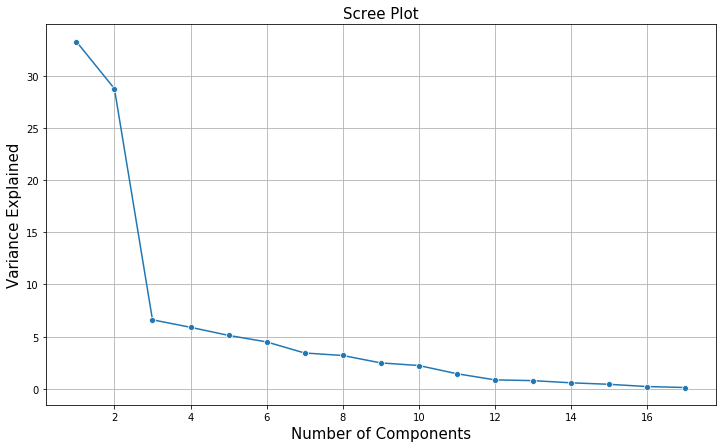

In [59]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

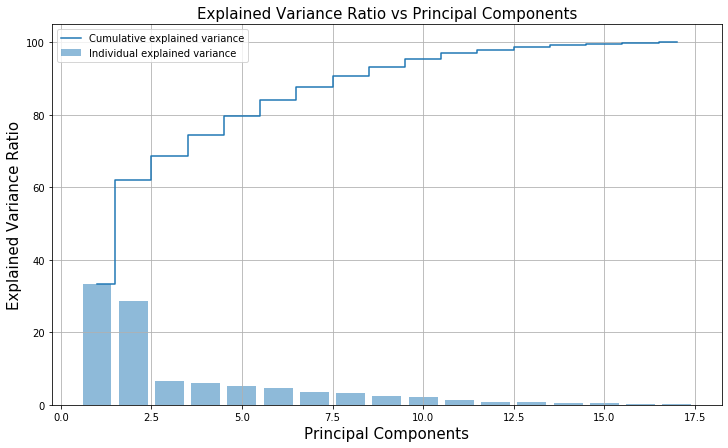

In [60]:
plt.figure(figsize=(12 ,7))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.xlabel('Principal Components',fontsize=15)
plt.title('Explained Variance Ratio vs Principal Components',fontsize=15)
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [108]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
data_reduced = pca.fit_transform(data_new)
data_reduced 

array([[-1.60249937,  0.99368301,  0.03004412, -1.00841718],
       [-1.80467546, -0.07041498,  2.12212943,  3.13891721],
       [-1.60828257, -1.38279213, -0.5015135 , -0.03636577],
       ...,
       [-0.57688268,  0.01779846,  0.3221599 , -0.58726468],
       [ 6.570952  , -1.1849301 ,  1.3259739 ,  0.07766873],
       [-0.47739307,  1.04394672, -1.4254376 , -1.30028226]])

In [62]:
pca.components_

array([[ 0.26217154,  0.23056246,  0.1892764 ,  0.33887452,  0.33469053,
         0.16329301,  0.02247971,  0.28354729,  0.24418659,  0.09670828,
        -0.03522996,  0.3264107 ,  0.32311598, -0.16315164,  0.18661083,
         0.32895585,  0.23882245],
       [ 0.31413626,  0.34462358,  0.38281332, -0.09931917, -0.0595055 ,
         0.39863637,  0.35755005, -0.25186362, -0.13190912,  0.09397395,
         0.23243959,  0.05513902,  0.0430332 ,  0.25980456, -0.25709255,
        -0.16000895, -0.16752366],
       [-0.08101773, -0.10765857, -0.08552971,  0.07882919,  0.050794  ,
        -0.07370782, -0.04035687, -0.01493949,  0.0211379 ,  0.69712113,
         0.53097281, -0.08111338, -0.05897862, -0.27415066, -0.10371589,
         0.18420572, -0.24533584],
       [ 0.0987761 ,  0.11814043,  0.00930723, -0.36911473, -0.41682463,
         0.01395047,  0.22535108,  0.26297539,  0.58089415, -0.03615628,
        -0.11498298, -0.14726093, -0.08900795, -0.25948612, -0.22398247,
         0.21375609

In [63]:
pca.explained_variance_ratio_

array([0.33266084, 0.28755345, 0.06617164, 0.05898144])

In [64]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var

array([33.3, 62.1, 68.7, 74.6])

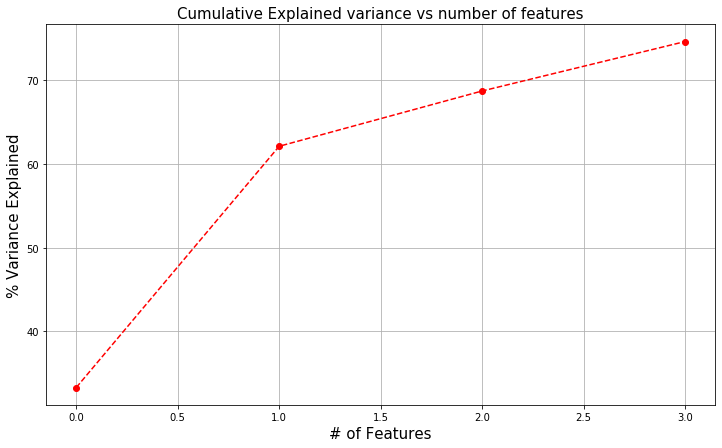

In [65]:
plt.figure(figsize=(12,7))
plt.plot(var, marker='o',linestyle='--',color='red')
plt.ylabel('% Variance Explained',fontsize=15)
plt.xlabel('# of Features',fontsize=15)
plt.title('Cumulative Explained variance vs number of features',fontsize=15)
plt.grid()
plt.show()

In [66]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_new))
df_comp.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.262172  0.230562  0.189276   0.338875   0.334691     0.163293   
1  0.314136  0.344624  0.382813  -0.099319  -0.059506     0.398636   
2 -0.081018 -0.107659 -0.085530   0.078829   0.050794    -0.073708   
3  0.098776  0.118140  0.009307  -0.369115  -0.416825     0.013950   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.022480  0.283547    0.244187  0.096708 -0.035230  0.326411  0.323116   
1     0.357550 -0.251864   -0.131909  0.093974  0.232440  0.055139  0.043033   
2    -0.040357 -0.014939    0.021138  0.697121  0.530973 -0.081113 -0.058979   
3     0.225351  0.262975    0.580894 -0.036156 -0.114983 -0.147261 -0.089008   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.163152     0.186611  0.328956   0.238822  
1   0.259805    -0.257093 -0.160009  -0.167524  
2  -0.274151    -0.103716  0.184206  -0.245336  
3  -0.259486    -0.223982  0.213756  -0.036192

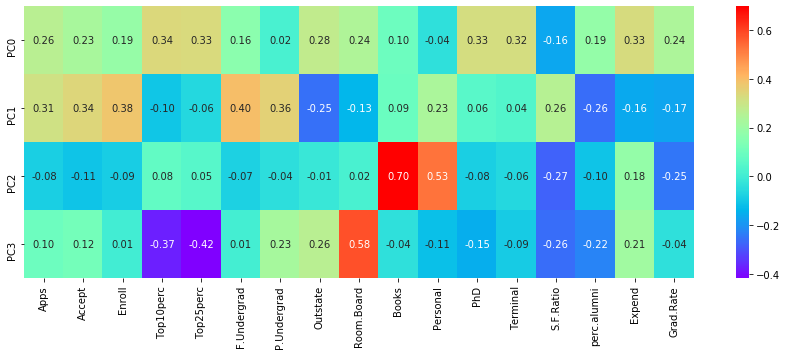

In [67]:
plt.figure(figsize=(15,5))
sns.heatmap(df_comp,cmap='rainbow',annot=True,fmt='.2f',yticklabels=['PC0','PC1','PC2','PC3'])
plt.show()

In [68]:
dfdata_reduced = pd.DataFrame(data_reduced)

In [69]:
dfdata_reduced.to_csv('ps2advstat.csv')

In [103]:
pca_df=pd.read_csv('ps2advstat.csv')

In [104]:
pca_df

Unnamed: 0         0         1         2         3
0             0 -1.602499  0.993683  0.030045 -1.008422
1             1 -1.804675 -0.070415  2.122126  3.138943
2             2 -1.608283 -1.382792 -0.501512 -0.036374
3             3  2.803644 -3.367395  0.367768 -0.632913
4             4 -2.200868 -0.099348  3.122524  0.657705
..          ...       ...       ...       ...       ...
772         772 -3.395392  1.995628 -0.744776  0.800067
773         773  0.319750 -0.314944  0.013597  0.653857
774         774 -0.576883  0.017798  0.322160 -0.587258
775         775  6.570952 -1.184930  1.325964  0.077707
776         776 -0.477393  1.043947 -1.425438 -1.300274

[777 rows x 5 columns]

In [105]:
pca_final = pca_df.drop(['Unnamed: 0'], axis = 1)

In [106]:
pca_final

0         1         2         3
0   -1.602499  0.993683  0.030045 -1.008422
1   -1.804675 -0.070415  2.122126  3.138943
2   -1.608283 -1.382792 -0.501512 -0.036374
3    2.803644 -3.367395  0.367768 -0.632913
4   -2.200868 -0.099348  3.122524  0.657705
..        ...       ...       ...       ...
772 -3.395392  1.995628 -0.744776  0.800067
773  0.319750 -0.314944  0.013597  0.653857
774 -0.576883  0.017798  0.322160 -0.587258
775  6.570952 -1.184930  1.325964  0.077707
776 -0.477393  1.043947 -1.425438 -1.300274

[777 rows x 4 columns]

In [71]:
pca_df.iloc[:, 1:5].corr().round()

0    1    2    3
0  1.0 -0.0 -0.0  0.0
1 -0.0  1.0 -0.0  0.0
2 -0.0 -0.0  1.0  0.0
3  0.0  0.0  0.0  1.0

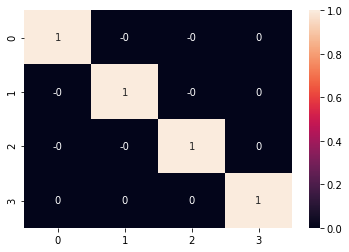

In [72]:
sns.heatmap(pca_df.iloc[:, 1:5].corr().round(), annot=True)

In [100]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_re = pca.fit_transform(data_new)
data_re 

array([[-1.60249936,  0.9936832 ],
       [-1.80467546, -0.07041504],
       [-1.60828255, -1.38279201],
       ...,
       [-0.57688268,  0.01779841],
       [ 6.57095197, -1.18493035],
       [-0.47739307,  1.04394645]])